# **Feature Selection, Model Selection, and Tuning (FMST) - Employee Promotion Eligibility Prediction at Likoma Company - By David Salako.**


## **Background and Context**

Employee Promotion means the ascension of an employee to higher ranks, this aspect of the job is what drives employees the most.
The ultimate reward for dedication and loyalty towards an organization and HR team plays an important role in handling all these promotion tasks based on ratings and other attributes available.

The HR team in Likoma company stored data of promotion cycle last year, which consists of details of all the employees in the company working last year and also if they got promoted or not, but every time this process gets delayed due to so many details available for each employee - it gets difficult to compare and decide.

So this time HR team wants to utilize the stored data to make a model, that will predict if a person is eligible for promotion or not.



## **Problem Statement:**

As a data scientist at Likoma company, I need to design a model that will help the HR team predict if an employee is eligible for promotion or not.




## **Objective:**

To build a model to explore, visualize, predict and identify the employees who have a higher probability of getting promoted. Subsequently optimize the classification model using appropriate techniques and finally generate a set of insights and recommendations that will help the company and its human resources department.
  

##**Data Dictionary & Description:**

* employee_id: Unique ID for the employee
* department: Department of employee
* region: Region of employment (unordered)
* education: Education Level
* gender: Gender of Employee
* recruitment_channel: Channel of recruitment for employee
* no_ of_ trainings: no of other trainings completed in the previous year on soft skills, technical skills, etc.
* age: Age of Employee
* previous_ year_ rating: Employee Rating for the previous year
* length_ of_ service: Length of service in years
* awards_ won: if awards won during the previous year then 1 else 0
* avg_ training_ score: Average score in current training evaluations
* is_promoted: (Target) Recommended for promotion


### Importing the necessary libraries

In [1]:
!pip install imblearn

In [2]:
!pip install xgboost

In [3]:
conda install -c conda-forge xgboost


Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.10.3
  latest version: 4.11.0

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /opt/anaconda3

  added / updated specs:
    - xgboost


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.11.0               |   py38h50d1736_0        16.9 MB  conda-forge
    ------------------------------------------------------------
                                           Total:        16.9 MB

The following NEW packages will be INSTALLED:

  python_abi         conda-forge/osx-64::python_abi-3.8-2_cp38

The following packages will be UPDATED:

  conda              pkgs/main::conda-4.10.3-py38hecd8cb5_0 --> conda-forge::conda-4.11.0-py38h50d1736_0



conda-4.11.0         | 16.9 MB   | ##################################### | 1

In [4]:
conda install scikit-learn

Solving environment: done

## Package Plan ##

  environment location: /opt/anaconda3

  added / updated specs:
    - scikit-learn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.11.0               |   py38hecd8cb5_0        14.4 MB
    ------------------------------------------------------------
                                           Total:        14.4 MB

The following packages will be SUPERSEDED by a higher-priority channel:

  conda              conda-forge::conda-4.11.0-py38h50d173~ --> pkgs/main::conda-4.11.0-py38hecd8cb5_0



conda-4.11.0         | 14.4 MB   | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done

Note: you may need to restart the kernel to use updated packages.


In [5]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# To tune model, get different metric scores, and split data
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
)
from sklearn import metrics

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# To impute missing values
from sklearn.impute import SimpleImputer

# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# To do hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

# To be used for creating pipelines and personalizing them
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To impute missing values
from sklearn.impute import KNNImputer

# To help with model building
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from xgboost import XGBClassifier

# To suppress scientific notations
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To supress warnings
import warnings

warnings.filterwarnings("ignore")

### Import Dataset

In [6]:
EmpPromotionData_Orig = pd.read_csv("employee_promotion_likoma_company.csv")

In [7]:
EmpPromotionData = EmpPromotionData_Orig.copy()

View the first and last 50 rows of the dataset.

In [8]:
EmpPromotionData.head(50)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.000,8,0,49.000,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.000,4,0,60.000,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.000,7,0,50.000,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.000,10,0,50.000,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.000,2,0,73.000,0
5,58896,Analytics,region_2,Bachelor's,m,sourcing,2,31,3.000,7,0,85.000,0
6,20379,Operations,region_20,Bachelor's,f,other,1,31,3.000,5,0,59.000,0
7,16290,Operations,region_34,Master's & above,m,sourcing,1,33,3.000,6,0,63.000,0
8,73202,Analytics,region_20,Bachelor's,m,other,1,28,4.000,5,0,83.000,0
9,28911,Sales & Marketing,region_1,Master's & above,m,sourcing,1,32,5.000,5,0,54.000,0


In [9]:
EmpPromotionData.tail(50)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
54758,15084,Finance,region_2,Bachelor's,f,sourcing,1,43,4.000,13,0,62.000,0
54759,64063,Sales & Marketing,region_7,Master's & above,m,other,3,35,1.000,10,0,51.000,0
54760,47825,Finance,region_22,Bachelor's,m,other,1,27,2.000,4,0,56.000,0
54761,8278,Procurement,region_13,Bachelor's,f,sourcing,1,30,4.000,2,0,86.000,1
54762,50165,Procurement,region_2,Master's & above,m,other,1,36,2.000,2,0,69.000,0
54763,69780,Operations,region_13,Bachelor's,m,sourcing,1,36,5.000,8,0,56.000,0
54764,52939,Sales & Marketing,region_22,Bachelor's,m,sourcing,1,46,1.000,4,0,47.000,0
54765,64712,Sales & Marketing,region_2,Bachelor's,m,other,2,33,1.000,3,0,48.000,0
54766,72727,Operations,region_32,Bachelor's,m,sourcing,1,37,3.000,3,0,55.000,0
54767,52325,Sales & Marketing,region_16,Bachelor's,m,other,1,49,4.000,5,0,47.000,0


#### The shape of the dataset.

In [10]:
EmpPromotionData.shape

(54808, 13)

#### 13 columns and 54808 rows of data.

#### Change the column names to uppercase format so that they are easier to read and identify.

In [11]:
EmpPromotionData['EMPLOYEE_ID'] = EmpPromotionData['employee_id']
EmpPromotionData['DEPARTMENT'] = EmpPromotionData['department']
EmpPromotionData['REGION'] = EmpPromotionData['region']
EmpPromotionData['EDUCATION'] = EmpPromotionData['education']
EmpPromotionData['GENDER'] = EmpPromotionData['gender']
EmpPromotionData['RECRUITMENT_CHANNEL'] = EmpPromotionData['recruitment_channel']
EmpPromotionData['NO_OF_TRAININGS'] = EmpPromotionData['no_of_trainings']
EmpPromotionData['AGE'] = EmpPromotionData['age']
EmpPromotionData['PREVIOUS_YEAR_RATING'] = EmpPromotionData['previous_year_rating']
EmpPromotionData['LENGTH_OF_SERVICE'] = EmpPromotionData['length_of_service']
EmpPromotionData['AWARDS_WON'] = EmpPromotionData['awards_won']
EmpPromotionData['AVG_TRAINING_SCORE'] = EmpPromotionData['avg_training_score']
EmpPromotionData['IS_PROMOTED'] = EmpPromotionData['is_promoted']

#### Drop the original columns as they are currently duplicated.

In [12]:
EmpPromotionData = EmpPromotionData.drop(columns = ['employee_id', 'department', 'region', 'education', 'gender', 'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating', 'length_of_service', 'awards_won', 'avg_training_score', 'is_promoted'])

#### Check the data types of the columns of the dataset.

In [13]:
EmpPromotionData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   EMPLOYEE_ID           54808 non-null  int64  
 1   DEPARTMENT            54808 non-null  object 
 2   REGION                54808 non-null  object 
 3   EDUCATION             52399 non-null  object 
 4   GENDER                54808 non-null  object 
 5   RECRUITMENT_CHANNEL   54808 non-null  object 
 6   NO_OF_TRAININGS       54808 non-null  int64  
 7   AGE                   54808 non-null  int64  
 8   PREVIOUS_YEAR_RATING  50684 non-null  float64
 9   LENGTH_OF_SERVICE     54808 non-null  int64  
 10  AWARDS_WON            54808 non-null  int64  
 11  AVG_TRAINING_SCORE    52248 non-null  float64
 12  IS_PROMOTED           54808 non-null  int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 5.4+ MB


*   IS_PROMOTED, DEPARTMENT, REGION, EDUCATION, GENDER, RECRUITMENT_CHANNEL, NO_OF_TRAININGS, and AWARDS_WON: These variables are categorical and should be treated as such.
*   There are null/misisng values in the data in the following variables: EDUCATION (2409), PREVIOUS_YEAR_RATING (4124), and AVG_TRAINING_SCORE (2560).
*   There are no spaces in the names of the columns and they have been previously converted to uppercase letter for easier readability. 
*   A mix of integer and categorical variables.
*   The categorical response variable (our dependent variable), representing if an employee has been promoted or not, is the variable called 'IS_PROMOTED'. [yes/no]  

In [14]:
# converting the data type of categorical features to 'category'
cat_cols = ['IS_PROMOTED','DEPARTMENT', 'REGION', 'EDUCATION', 'GENDER', 'RECRUITMENT_CHANNEL', 'NO_OF_TRAININGS',  'AWARDS_WON']
EmpPromotionData[cat_cols] = EmpPromotionData[cat_cols].astype('category')
EmpPromotionData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   EMPLOYEE_ID           54808 non-null  int64   
 1   DEPARTMENT            54808 non-null  category
 2   REGION                54808 non-null  category
 3   EDUCATION             52399 non-null  category
 4   GENDER                54808 non-null  category
 5   RECRUITMENT_CHANNEL   54808 non-null  category
 6   NO_OF_TRAININGS       54808 non-null  category
 7   AGE                   54808 non-null  int64   
 8   PREVIOUS_YEAR_RATING  50684 non-null  float64 
 9   LENGTH_OF_SERVICE     54808 non-null  int64   
 10  AWARDS_WON            54808 non-null  category
 11  AVG_TRAINING_SCORE    52248 non-null  float64 
 12  IS_PROMOTED           54808 non-null  category
dtypes: category(8), float64(2), int64(3)
memory usage: 2.5 MB


In [15]:
# Replace the string region names with numeric values for easier computation.
EmpPromotionData.REGION=EmpPromotionData.REGION.replace('region_1', 1)
EmpPromotionData.REGION=EmpPromotionData.REGION.replace('region_2', 2)
EmpPromotionData.REGION=EmpPromotionData.REGION.replace('region_3', 3)
EmpPromotionData.REGION=EmpPromotionData.REGION.replace('region_4', 4)
EmpPromotionData.REGION=EmpPromotionData.REGION.replace('region_5', 5)
EmpPromotionData.REGION=EmpPromotionData.REGION.replace('region_6', 6)
EmpPromotionData.REGION=EmpPromotionData.REGION.replace('region_7', 7)
EmpPromotionData.REGION=EmpPromotionData.REGION.replace('region_8', 8)
EmpPromotionData.REGION=EmpPromotionData.REGION.replace('region_9', 9)
EmpPromotionData.REGION=EmpPromotionData.REGION.replace('region_10', 10)
EmpPromotionData.REGION=EmpPromotionData.REGION.replace('region_11', 11)
EmpPromotionData.REGION=EmpPromotionData.REGION.replace('region_12', 12)
EmpPromotionData.REGION=EmpPromotionData.REGION.replace('region_13', 13)
EmpPromotionData.REGION=EmpPromotionData.REGION.replace('region_14', 14)
EmpPromotionData.REGION=EmpPromotionData.REGION.replace('region_15', 15)
EmpPromotionData.REGION=EmpPromotionData.REGION.replace('region_16', 16)
EmpPromotionData.REGION=EmpPromotionData.REGION.replace('region_17', 17)
EmpPromotionData.REGION=EmpPromotionData.REGION.replace('region_18', 18)
EmpPromotionData.REGION=EmpPromotionData.REGION.replace('region_19', 19)
EmpPromotionData.REGION=EmpPromotionData.REGION.replace('region_20', 20)
EmpPromotionData.REGION=EmpPromotionData.REGION.replace('region_21', 21)
EmpPromotionData.REGION=EmpPromotionData.REGION.replace('region_22', 22)
EmpPromotionData.REGION=EmpPromotionData.REGION.replace('region_23', 23)
EmpPromotionData.REGION=EmpPromotionData.REGION.replace('region_24', 24)
EmpPromotionData.REGION=EmpPromotionData.REGION.replace('region_25', 25)
EmpPromotionData.REGION=EmpPromotionData.REGION.replace('region_26', 26)
EmpPromotionData.REGION=EmpPromotionData.REGION.replace('region_27', 27)
EmpPromotionData.REGION=EmpPromotionData.REGION.replace('region_28', 28)
EmpPromotionData.REGION=EmpPromotionData.REGION.replace('region_29', 29)
EmpPromotionData.REGION=EmpPromotionData.REGION.replace('region_30', 30)
EmpPromotionData.REGION=EmpPromotionData.REGION.replace('region_31', 31)
EmpPromotionData.REGION=EmpPromotionData.REGION.replace('region_32', 32)
EmpPromotionData.REGION=EmpPromotionData.REGION.replace('region_33', 33)
EmpPromotionData.REGION=EmpPromotionData.REGION.replace('region_34', 34)


#### Check the conversion has taken place in the REGION variable.

In [16]:
EmpPromotionData.head(50)

,EMPLOYEE_ID,DEPARTMENT,REGION,EDUCATION,GENDER,RECRUITMENT_CHANNEL,NO_OF_TRAININGS,AGE,PREVIOUS_YEAR_RATING,LENGTH_OF_SERVICE,AWARDS_WON,AVG_TRAINING_SCORE,IS_PROMOTED
0,65438,Sales & Marketing,7,Master's & above,f,sourcing,1,35,5.000,8,0,49.000,0
1,65141,Operations,22,Bachelor's,m,other,1,30,5.000,4,0,60.000,0
2,7513,Sales & Marketing,19,Bachelor's,m,sourcing,1,34,3.000,7,0,50.000,0
3,2542,Sales & Marketing,23,Bachelor's,m,other,2,39,1.000,10,0,50.000,0
4,48945,Technology,26,Bachelor's,m,other,1,45,3.000,2,0,73.000,0
5,58896,Analytics,2,Bachelor's,m,sourcing,2,31,3.000,7,0,85.000,0
6,20379,Operations,20,Bachelor's,f,other,1,31,3.000,5,0,59.000,0
7,16290,Operations,34,Master's & above,m,sourcing,1,33,3.000,6,0,63.000,0
8,73202,Analytics,20,Bachelor's,m,other,1,28,4.000,5,0,83.000,0
9,28911,Sales & Marketing,1,Master's & above,m,sourcing,1,32,5.000,5,0,54.000,0


#### Convert the REGION variable to a categorical data type.

In [17]:
EmpPromotionData.REGION = EmpPromotionData.REGION.astype('category')

#### Check the data type of the REGION column of the dataset.

In [18]:
EmpPromotionData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   EMPLOYEE_ID           54808 non-null  int64   
 1   DEPARTMENT            54808 non-null  category
 2   REGION                54808 non-null  category
 3   EDUCATION             52399 non-null  category
 4   GENDER                54808 non-null  category
 5   RECRUITMENT_CHANNEL   54808 non-null  category
 6   NO_OF_TRAININGS       54808 non-null  category
 7   AGE                   54808 non-null  int64   
 8   PREVIOUS_YEAR_RATING  50684 non-null  float64 
 9   LENGTH_OF_SERVICE     54808 non-null  int64   
 10  AWARDS_WON            54808 non-null  category
 11  AVG_TRAINING_SCORE    52248 non-null  float64 
 12  IS_PROMOTED           54808 non-null  category
dtypes: category(8), float64(2), int64(3)
memory usage: 2.5 MB


In [19]:
# Replace the EDUCATION text values with values without spaces and apostrophes for easier computation.
EmpPromotionData.EDUCATION=EmpPromotionData.EDUCATION.replace("Below Secondary", "Secondary_Level")
EmpPromotionData.EDUCATION=EmpPromotionData.EDUCATION.replace("Bachelor's", "Bachelor_Level")
EmpPromotionData.EDUCATION=EmpPromotionData.EDUCATION.replace("Master's & above", "Master_Level")

# Replace the DEPARTMENT value of 'Sales & Marketing' with 'Sales_&_Marketing' to eliminate the spaces
EmpPromotionData.DEPARTMENT=EmpPromotionData.DEPARTMENT.replace("Sales & Marketing", "Sales_&_Marketing")

# Replace the lowercase GENDER values'm' and 'f' with uppercase 'M' and 'F'.
EmpPromotionData.GENDER=EmpPromotionData.GENDER.replace("m", "M")
EmpPromotionData.GENDER=EmpPromotionData.GENDER.replace("f", "F")

# Replace the lowercase RECRUITMENT_CHANNEL values now begin with an uppercase letter.
EmpPromotionData.RECRUITMENT_CHANNEL=EmpPromotionData.RECRUITMENT_CHANNEL.replace("other", "Other")
EmpPromotionData.RECRUITMENT_CHANNEL=EmpPromotionData.RECRUITMENT_CHANNEL.replace("referred", "Referred")
EmpPromotionData.RECRUITMENT_CHANNEL=EmpPromotionData.RECRUITMENT_CHANNEL.replace("sourcing", "Sourcing")

#### Confirm that the changes in the EDUCATION, GENDER, RECRUITMENT_CHANNEL, and DEPARTMENT variables have been made.

In [20]:
EmpPromotionData.tail(50)

,EMPLOYEE_ID,DEPARTMENT,REGION,EDUCATION,GENDER,RECRUITMENT_CHANNEL,NO_OF_TRAININGS,AGE,PREVIOUS_YEAR_RATING,LENGTH_OF_SERVICE,AWARDS_WON,AVG_TRAINING_SCORE,IS_PROMOTED
54758,15084,Finance,2,Bachelor_Level,F,Sourcing,1,43,4.000,13,0,62.000,0
54759,64063,Sales_&_Marketing,7,Master_Level,M,Other,3,35,1.000,10,0,51.000,0
54760,47825,Finance,22,Bachelor_Level,M,Other,1,27,2.000,4,0,56.000,0
54761,8278,Procurement,13,Bachelor_Level,F,Sourcing,1,30,4.000,2,0,86.000,1
54762,50165,Procurement,2,Master_Level,M,Other,1,36,2.000,2,0,69.000,0
54763,69780,Operations,13,Bachelor_Level,M,Sourcing,1,36,5.000,8,0,56.000,0
54764,52939,Sales_&_Marketing,22,Bachelor_Level,M,Sourcing,1,46,1.000,4,0,47.000,0
54765,64712,Sales_&_Marketing,2,Bachelor_Level,M,Other,2,33,1.000,3,0,48.000,0
54766,72727,Operations,32,Bachelor_Level,M,Sourcing,1,37,3.000,3,0,55.000,0
54767,52325,Sales_&_Marketing,16,Bachelor_Level,M,Other,1,49,4.000,5,0,47.000,0


#### Reconfirm the counts of NULL records that currently exist in the dataset.

In [21]:
EmpPromotionData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   EMPLOYEE_ID           54808 non-null  int64   
 1   DEPARTMENT            54808 non-null  category
 2   REGION                54808 non-null  category
 3   EDUCATION             52399 non-null  category
 4   GENDER                54808 non-null  category
 5   RECRUITMENT_CHANNEL   54808 non-null  category
 6   NO_OF_TRAININGS       54808 non-null  category
 7   AGE                   54808 non-null  int64   
 8   PREVIOUS_YEAR_RATING  50684 non-null  float64 
 9   LENGTH_OF_SERVICE     54808 non-null  int64   
 10  AWARDS_WON            54808 non-null  category
 11  AVG_TRAINING_SCORE    52248 non-null  float64 
 12  IS_PROMOTED           54808 non-null  category
dtypes: category(8), float64(2), int64(3)
memory usage: 2.5 MB


Continuous columns

In [22]:
EmpPromotionData.describe().T # continuous columns

,count,mean,std,min,25%,50%,75%,max
EMPLOYEE_ID,54808.000,39195.831,22586.581,1.000,19669.750,39225.500,58730.500,78298.000
AGE,54808.000,34.804,7.660,20.000,29.000,33.000,39.000,60.000
PREVIOUS_YEAR_RATING,50684.000,3.329,1.260,1.000,3.000,3.000,4.000,5.000
LENGTH_OF_SERVICE,54808.000,5.866,4.265,1.000,3.000,5.000,7.000,37.000
AVG_TRAINING_SCORE,52248.000,63.712,13.522,39.000,51.000,60.000,77.000,99.000


* AGE: Mean age of the employees is approximately 35 years and has a very wide range of 20 to 60 years. A median age of 33 is close to the mean and might indicate a close to normal distribution.
* AVG_TRAINING_SCORE: A mean account balance of approximately 64 with a median of 60. A range of 39 to 99. The distribution should resemble a normal distribution.
* LENGTH_OF_SERVICE: Mean length is 5.9 years with a median of 5.0 years and a maximum of 37 years. Minimum length of service is 1 year.
* PREVIOUS_YEAR_RATING: Mean is 3.3, median is 3.0, lowest is 1.0, and highest is 7.0.
* EMPLOYEE_ID: All unique records therefore the statistical descriptions here are meaningless to the model buliding.

Categorical columns

In [23]:
EmpPromotionData.describe(include=['category']).T # categorical columns

,count,unique,top,freq
DEPARTMENT,54808,9,Sales_&_Marketing,16840
REGION,54808,34,2,12343
EDUCATION,52399,3,Bachelor_Level,36669
GENDER,54808,2,M,38496
RECRUITMENT_CHANNEL,54808,3,Other,30446
NO_OF_TRAININGS,54808,10,1,44378
AWARDS_WON,54808,2,0,53538
IS_PROMOTED,54808,2,0,50140


* IS_PROMOTED: The majority (50140 out of 54808 - 91.4%) of the employees in this dataset were not promoted. 
* DEPARTMENT: (16840 out of 54808 - 3.1% (the highest number) of the employees are in Sales and Marketing.
* REGION: 22.5% (the majority) of the employees are from region 2.
* EDUCATION: Approximately 67% (36669 out of 54808) of the employees have a Bachelor's level of education.
* GENDER: (38496 out of 54808 - 70.2%) of the  employees in this data set are male.
* RECRUITMENT_CHANNEL: (30446 out of 54808 - 55.6%) of the employees were recruited from the 'Other' category.
* NO_OF_TRAININGS: (44378 out of 54808 - 81%) of the employees have had 1 training completed in the previous year.
* AWARDS_WON: 53538 out of 54808 - 97.7% (the majority) of the employees did not win any awards in the previous year.




### Number of observations in each category.

In [24]:
cat_cols = EmpPromotionData.select_dtypes(['category'])

In [25]:
for i in cat_cols:
  print('Unique values by count in',i, 'are :')
  print(''*50)
  print(EmpPromotionData[i].value_counts())
  print(''*50)
  print('Unique values by percentage in',i, 'are :')
  print(''*50)
  print((EmpPromotionData[i].value_counts(normalize=True)*100))
  print(''*50)
  print('*'*50)
  print(''*50)

Unique values by count in DEPARTMENT are :

Sales_&_Marketing    16840
Operations           11348
Technology            7138
Procurement           7138
Analytics             5352
Finance               2536
HR                    2418
Legal                 1039
R&D                    999
Name: DEPARTMENT, dtype: int64

Unique values by percentage in DEPARTMENT are :

Sales_&_Marketing   30.725
Operations          20.705
Technology          13.024
Procurement         13.024
Analytics            9.765
Finance              4.627
HR                   4.412
Legal                1.896
R&D                  1.823
Name: DEPARTMENT, dtype: float64

**************************************************

Unique values by count in REGION are :

2     12343
22     6428
7      4843
15     2808
13     2648
26     2260
31     1935
4      1703
27     1659
16     1465
28     1318
11     1315
23     1175
29      994
32      945
19      874
20      850
14      827
25      819
17      796
5       766
6       690

* IS_PROMOTED: The dataset is imbalanced, approximately 9% of the employees were promoted with the negative state dominating at approximately 91%. This will have an impact on model perfomance measures in the subsequent part of this analysis. We need to make sure that the ratio is preserved in both train and test datasets and also perhaps correct the imbalance using the Python imbalace correction library imblearn.

## Exploratory Data Analysis (EDA).

### Univariate Analysis.

In [26]:
# While doing uni-variate analysis of numerical variables we want to study their central tendency 
# and dispersion.
# Let us write a function that will help us create boxplot and histogram for any input numerical 
# variable.
# This function takes the numerical column as the input and returns the boxplots 
# and histograms for the variable.
# Let us see if this help us write faster and cleaner code.
def histogram_boxplot(feature, figsize=(15,10), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='violet') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins,color = 'orange') if bins else sns.distplot(feature, kde=False, ax=ax_hist2,color='tab:cyan') # For histogram
    ax_hist2.axvline(np.mean(feature), color='purple', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

#### Boxplot and Histogram plots for the important independent numeric variables.

#### Observations on AGE.

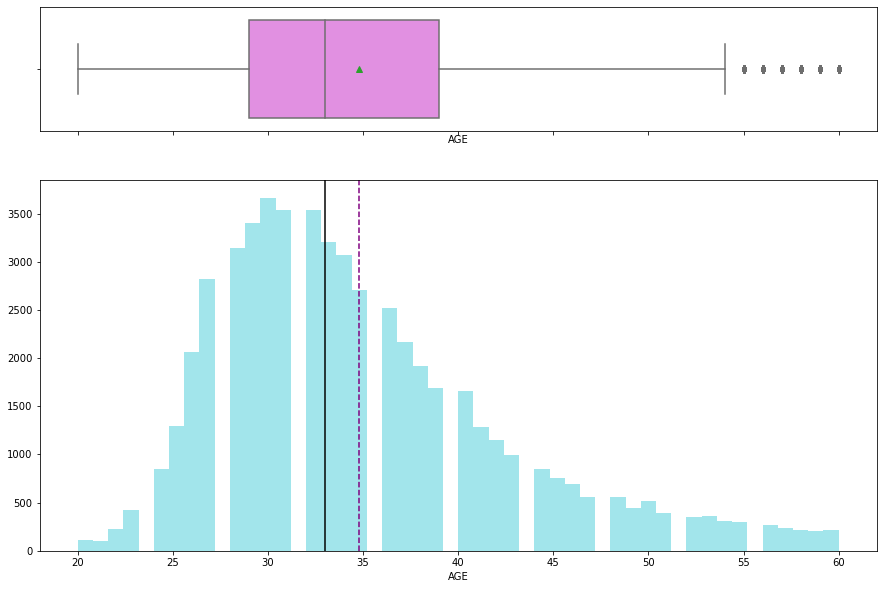

In [27]:
histogram_boxplot(EmpPromotionData['AGE'])

In [28]:
len (EmpPromotionData[EmpPromotionData['AGE'] > 32] ) / len(EmpPromotionData) * 100

54.04685447379944

In [29]:
len (EmpPromotionData[EmpPromotionData['AGE'] > 32] ) 

29622

In [30]:
len (EmpPromotionData[EmpPromotionData['AGE'] < 33] ) / len(EmpPromotionData) * 100

45.95314552620056

In [31]:
len (EmpPromotionData[EmpPromotionData['AGE'] < 33] )

25186

In [32]:
EmpPromotionData['AGE'].value_counts(normalize=True)

30   0.067
31   0.064
32   0.064
29   0.062
33   0.059
28   0.057
34   0.056
27   0.052
35   0.049
36   0.046
37   0.040
26   0.038
38   0.035
39   0.031
40   0.030
25   0.024
41   0.024
42   0.021
43   0.018
44   0.015
24   0.015
45   0.014
46   0.013
47   0.010
48   0.010
50   0.010
49   0.008
23   0.008
51   0.007
53   0.007
52   0.006
54   0.006
55   0.005
56   0.005
57   0.004
22   0.004
60   0.004
58   0.004
59   0.004
20   0.002
21   0.002
Name: AGE, dtype: float64

* AGE: The age of the employee.
* Somewhat normal distribution with a slight right skew. 
* Mean (5.9) and median (5.0).
* Outliers are present above the age of 54 (1435 records out of 52399 ~ 2.7%).
* The majority of the employees are aged between 26 and 36.

#### Observations on AVG_TRAINING_SCORE.

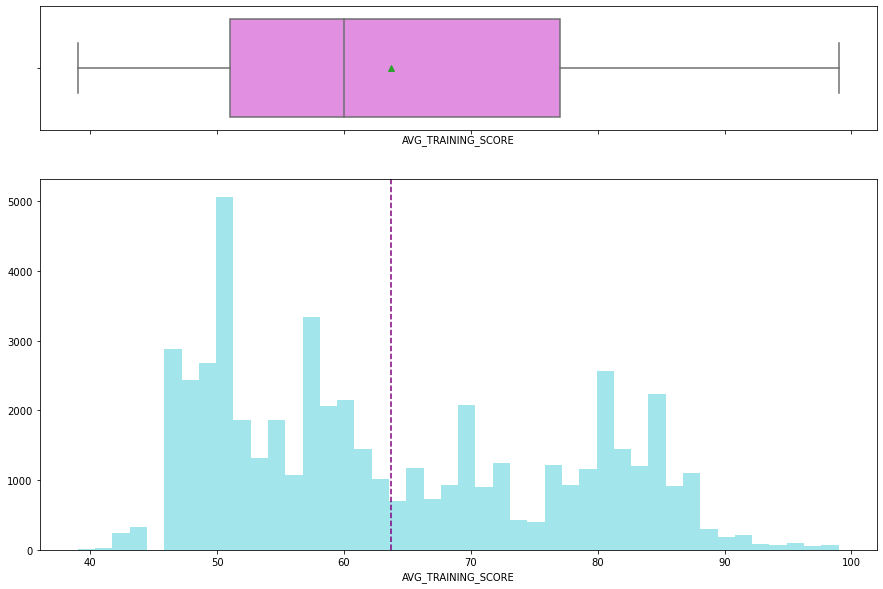

In [33]:
histogram_boxplot(EmpPromotionData['AVG_TRAINING_SCORE'])

In [34]:
len (EmpPromotionData[EmpPromotionData['AVG_TRAINING_SCORE'] > 60] ) / len(EmpPromotionData) * 100

45.442271201284484

In [35]:
len (EmpPromotionData[EmpPromotionData['AVG_TRAINING_SCORE'] > 60] ) 

24906

In [36]:
len (EmpPromotionData[EmpPromotionData['AVG_TRAINING_SCORE'] < 61] ) / len(EmpPromotionData) * 100

49.886877828054295

In [37]:
len (EmpPromotionData[EmpPromotionData['AVG_TRAINING_SCORE'] < 61] )

27342

In [38]:
EmpPromotionData['AVG_TRAINING_SCORE'].value_counts(normalize=True)

50.000   0.052
49.000   0.051
48.000   0.047
51.000   0.045
60.000   0.041
59.000   0.040
58.000   0.036
52.000   0.036
47.000   0.033
62.000   0.028
82.000   0.028
57.000   0.028
81.000   0.026
53.000   0.025
80.000   0.023
83.000   0.023
84.000   0.022
79.000   0.022
46.000   0.022
85.000   0.021
56.000   0.020
70.000   0.020
63.000   0.020
69.000   0.019
54.000   0.019
68.000   0.018
78.000   0.018
86.000   0.017
71.000   0.017
55.000   0.017
67.000   0.014
72.000   0.014
64.000   0.014
77.000   0.013
87.000   0.013
65.000   0.011
66.000   0.011
73.000   0.010
76.000   0.010
88.000   0.008
74.000   0.008
75.000   0.008
44.000   0.006
89.000   0.006
90.000   0.004
43.000   0.003
91.000   0.002
92.000   0.002
93.000   0.002
94.000   0.001
42.000   0.001
97.000   0.001
96.000   0.001
95.000   0.001
98.000   0.001
99.000   0.001
41.000   0.000
40.000   0.000
39.000   0.000
Name: AVG_TRAINING_SCORE, dtype: float64

* AVG_TRAINING_SCORE: Average score in current training evaluations..
* Somewhat normal distribution with a slight right skew. 
* Approximately equal mean and median.
* No outliers are present.
* The distribution looks like it has more than one peak, the late 40s, around 60 and 80.

#### Observations on PREVIOUS_YEAR_RATING.

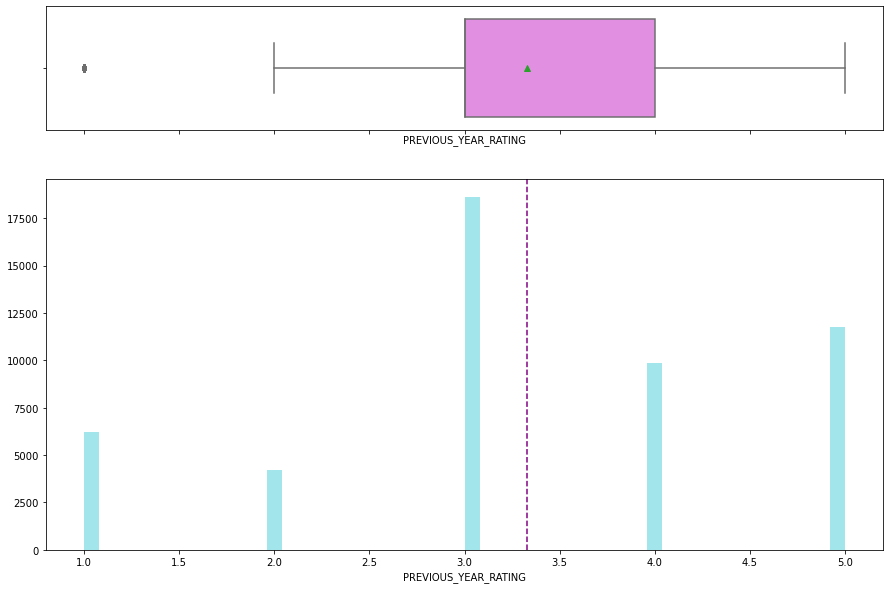

In [39]:
histogram_boxplot(EmpPromotionData['PREVIOUS_YEAR_RATING'])

In [40]:
len (EmpPromotionData[EmpPromotionData['PREVIOUS_YEAR_RATING'] > 2.99] ) / len(EmpPromotionData) * 100

73.41264049043936

In [41]:
len (EmpPromotionData[EmpPromotionData['PREVIOUS_YEAR_RATING'] > 2.99] )

40236

In [42]:
len (EmpPromotionData[EmpPromotionData['PREVIOUS_YEAR_RATING'] < 3.00] ) / len(EmpPromotionData) * 100

19.06291052401109

In [43]:
len (EmpPromotionData[EmpPromotionData['PREVIOUS_YEAR_RATING'] < 3.00] ) 

10448

In [44]:
EmpPromotionData['PREVIOUS_YEAR_RATING'].value_counts(normalize=True)

3.000   0.367
5.000   0.232
4.000   0.195
1.000   0.123
2.000   0.083
Name: PREVIOUS_YEAR_RATING, dtype: float64

* PREVIOUS_YEAR_RATING: Employee rating for the previous year.
* Right skewed distribution. 
* Approximately equal mean and median.
* No outliers.
* The distribution looks like it has more than one peak, 3.0s and then a second place peak at 5.0s.

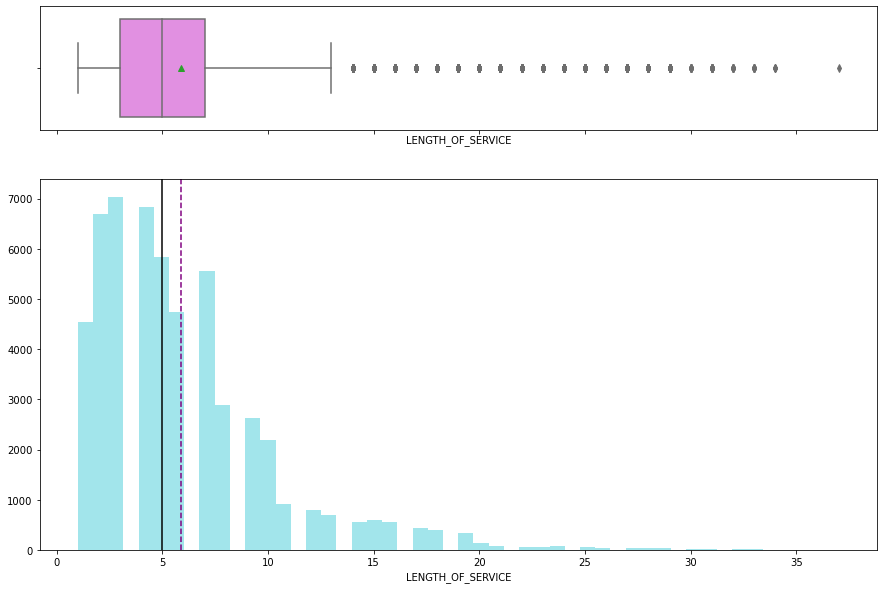

In [45]:
histogram_boxplot(EmpPromotionData['LENGTH_OF_SERVICE'])

In [46]:
len (EmpPromotionData[EmpPromotionData['LENGTH_OF_SERVICE'] > 4.99] ) / len(EmpPromotionData) * 100

54.2037658735951

In [47]:
len (EmpPromotionData[EmpPromotionData['LENGTH_OF_SERVICE'] > 4.99] ) 

29708

In [48]:
len (EmpPromotionData[EmpPromotionData['LENGTH_OF_SERVICE'] < 5.00] ) / len(EmpPromotionData) * 100

45.796234126404904

In [49]:
len (EmpPromotionData[EmpPromotionData['LENGTH_OF_SERVICE'] < 5.00] ) 

25100

In [50]:
EmpPromotionData['LENGTH_OF_SERVICE'].value_counts(normalize=True)

3    0.128
4    0.125
2    0.122
5    0.106
7    0.101
6    0.086
1    0.083
8    0.053
9    0.048
10   0.040
11   0.017
12   0.014
13   0.013
15   0.011
14   0.010
16   0.010
17   0.008
18   0.007
19   0.006
20   0.002
21   0.001
24   0.001
23   0.001
22   0.001
25   0.001
26   0.001
27   0.001
28   0.001
29   0.001
31   0.000
30   0.000
32   0.000
33   0.000
34   0.000
37   0.000
Name: LENGTH_OF_SERVICE, dtype: float64

* LENGTH_OF_SERVICE: Length of service in years.
* Right skewed distribution. 
* Approximately equal mean and median.
* Lots of outliers 13 years and above.

####Let us define a function to create barplots for the categorical variables indicating the percentage of each category for each of the variables.


In [51]:
# Function to create barplots that indicate percentage for each category.

def perc_on_bar(z):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''

    total = len(EmpPromotionData[z]) # length of the column
    plt.figure(figsize=(15,5))
    ax = sns.countplot(EmpPromotionData[z],palette='Paired')
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # height of the plot
        
        ax.annotate(percentage, (x, y), size = 12) # annotate the percentage 
    plt.show() # show the plot

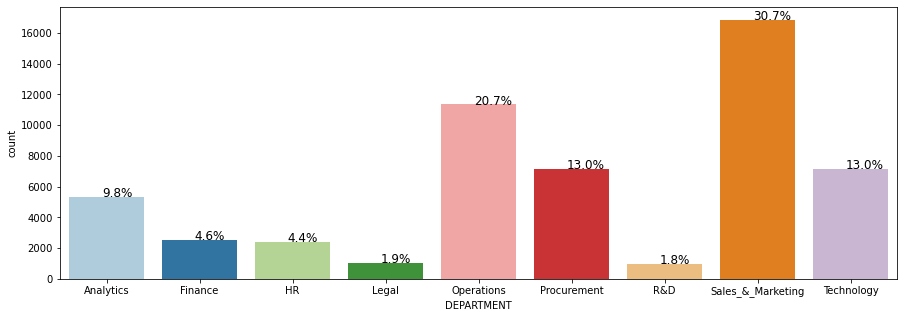

In [52]:
perc_on_bar('DEPARTMENT') # Department of employee.

* Sales and Marketing has the highest number of employees at 30.7%.
* The Operations department has the next highest (20.7%) followed by Procurement (13.0%) and Technology (13.0%) respectively.

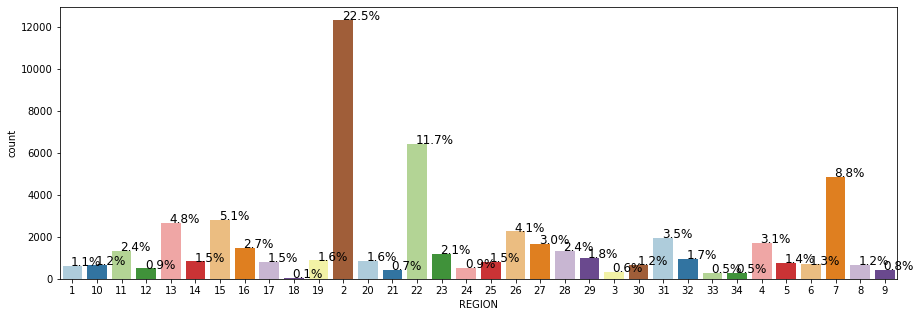

In [53]:
perc_on_bar('REGION') # Region of employment (unordered).

* An employee in region of employment 2 was the most common value at 22.5% of the total.
* In second place is region of employment of 22 (11.7%) and interestingly in third place is a rating of 7 (8.8.%).

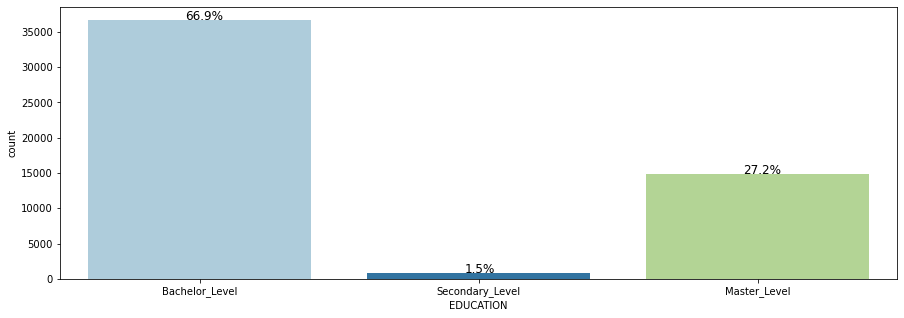

In [54]:
perc_on_bar('EDUCATION') # Education level.

* Bachelor level educated employees are the largest slice at 66.9%.

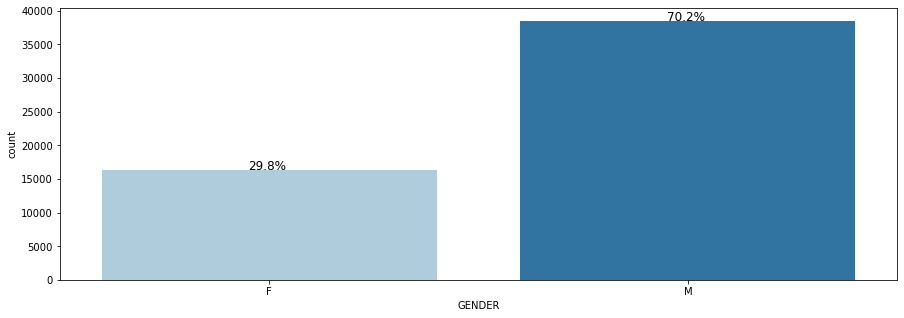

In [55]:
perc_on_bar('GENDER') # Gender of employee.

* The majority of employees are male at 70.2%.

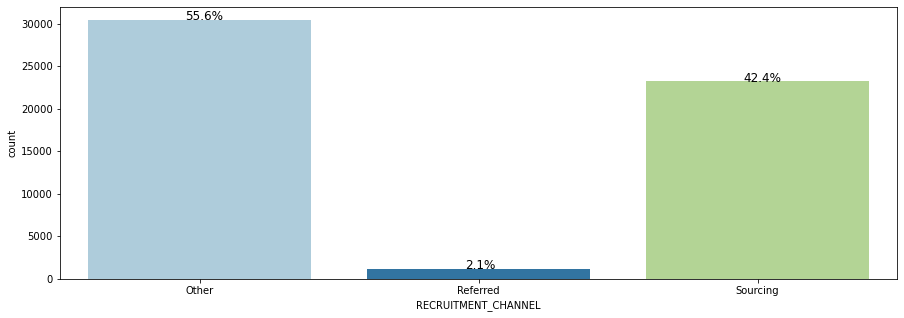

In [56]:
perc_on_bar('RECRUITMENT_CHANNEL') # Channel of recrutiment for employee.

* The 'other' recruitment channel is the most commom at 55.6% with 'sourcing' coming second at 42.4%.

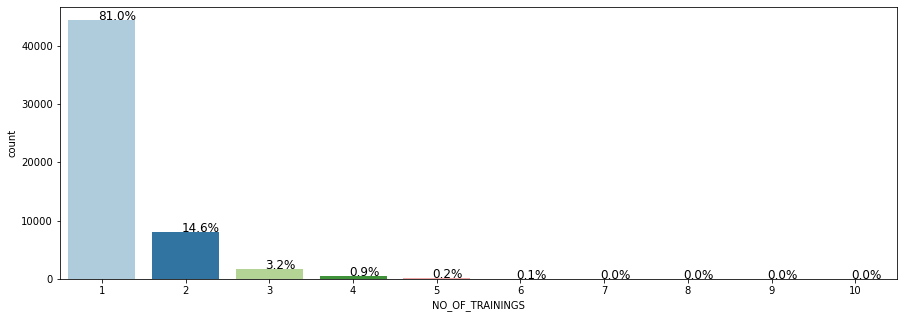

In [57]:
perc_on_bar('NO_OF_TRAININGS') # Number of other trainings completed in the previous year on soft skills, technical skills etc.

* By a commanding lead 81% of the records show that most of the employees had 1 training completed in the previous year.

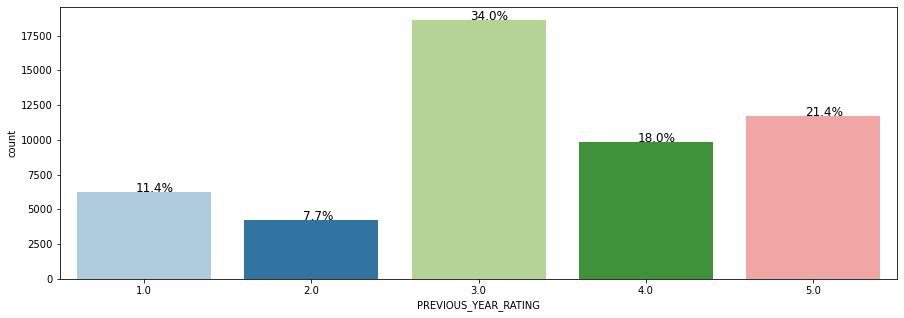

In [58]:
perc_on_bar('PREVIOUS_YEAR_RATING') # Employee rating for the previous year.

* An employee rating for the previous year of 3.0 was the most common value at 34% of the total (18618 out of 54808).
* In second place is a rating of 5.0 (11.7%) and in third place is a rating of 4.0 (18%).

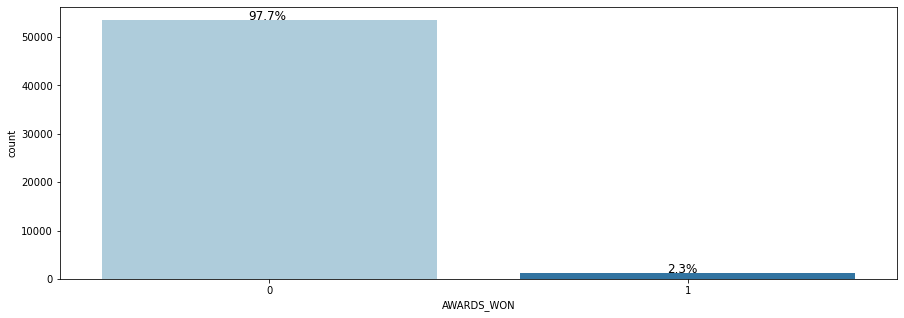

In [59]:
perc_on_bar('AWARDS_WON') # If awards were won in the previous year then 1 else 0.


* 97.7% of employees have not won an award in the previous year.

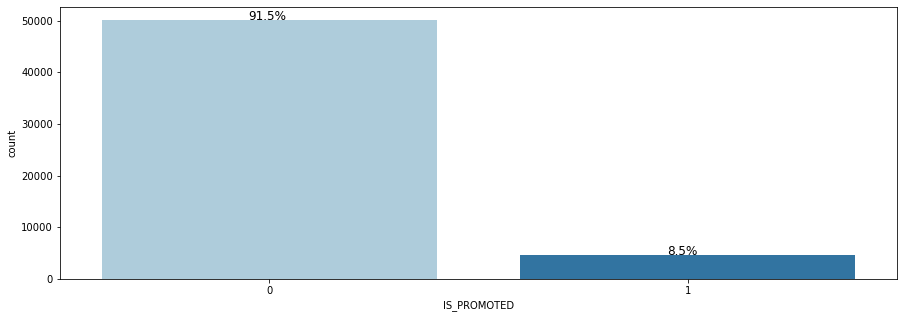

In [60]:
perc_on_bar('IS_PROMOTED') # Recommended for promotion. The target dependent variable.

* This plot shows the distribution of both classes in the target variable is `imbalanced`.
* We only have 91.5% of employees who have not been recommended for promotion.

### Bivariate Analysis

For ease of analytical computation, I will temporarily convert all the string values in the categorical variables to numeric values. Then their data types will be converted to int64 data type.

In [61]:

EmpPromotionData.EDUCATION=EmpPromotionData.EDUCATION.replace( "Secondary_Level", 1)
EmpPromotionData.EDUCATION=EmpPromotionData.EDUCATION.replace("Bachelor_Level", 2)
EmpPromotionData.EDUCATION=EmpPromotionData.EDUCATION.replace("Master_Level",3)


EmpPromotionData.DEPARTMENT=EmpPromotionData.DEPARTMENT.replace("Analytics", 1)
EmpPromotionData.DEPARTMENT=EmpPromotionData.DEPARTMENT.replace("Finance", 2)
EmpPromotionData.DEPARTMENT=EmpPromotionData.DEPARTMENT.replace("HR", 3)
EmpPromotionData.DEPARTMENT=EmpPromotionData.DEPARTMENT.replace("Legal", 4)
EmpPromotionData.DEPARTMENT=EmpPromotionData.DEPARTMENT.replace("Operations", 5)
EmpPromotionData.DEPARTMENT=EmpPromotionData.DEPARTMENT.replace("Procurement", 6)
EmpPromotionData.DEPARTMENT=EmpPromotionData.DEPARTMENT.replace("R&D", 7)
EmpPromotionData.DEPARTMENT=EmpPromotionData.DEPARTMENT.replace("Sales_&_Marketing", 8)
EmpPromotionData.DEPARTMENT=EmpPromotionData.DEPARTMENT.replace("Technology", 9)


EmpPromotionData.GENDER=EmpPromotionData.GENDER.replace("M", 2)
EmpPromotionData.GENDER=EmpPromotionData.GENDER.replace("F", 1)

EmpPromotionData.RECRUITMENT_CHANNEL=EmpPromotionData.RECRUITMENT_CHANNEL.replace("Other", 1)
EmpPromotionData.RECRUITMENT_CHANNEL=EmpPromotionData.RECRUITMENT_CHANNEL.replace("Referred", 2)
EmpPromotionData.RECRUITMENT_CHANNEL=EmpPromotionData.RECRUITMENT_CHANNEL.replace("Sourcing", 3)

# Replace nulls with zeros in PREVIOUS_YEAR_RATING so that errors are not generated in data type conversions.
EmpPromotionData.PREVIOUS_YEAR_RATING=EmpPromotionData.PREVIOUS_YEAR_RATING.replace(np.NaN, 0)


In [62]:
EmpPromotionData.IS_PROMOTED = EmpPromotionData.IS_PROMOTED.astype('int64')
EmpPromotionData.AWARDS_WON = EmpPromotionData.AWARDS_WON.astype('int64')
EmpPromotionData.REGION = EmpPromotionData.REGION.astype('int64')
EmpPromotionData.PREVIOUS_YEAR_RATING = EmpPromotionData.PREVIOUS_YEAR_RATING.astype('int64')
EmpPromotionData.NO_OF_TRAININGS = EmpPromotionData.NO_OF_TRAININGS.astype('int64')

EmpPromotionData.DEPARTMENT = EmpPromotionData.DEPARTMENT.astype('int64')
EmpPromotionData.GENDER = EmpPromotionData.GENDER.astype('int64')
EmpPromotionData.RECRUITMENT_CHANNEL = EmpPromotionData.RECRUITMENT_CHANNEL.astype('int64')


#### Correlation matrix for the numeric independent variables.

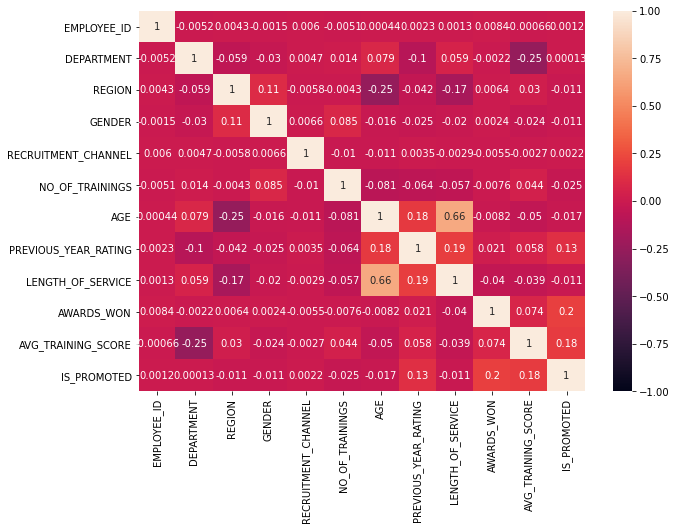

In [63]:
plt.figure(figsize=(10,7))
sns.heatmap(EmpPromotionData.corr(),annot=True,vmin=-1,vmax=1,fmt='.2g')
plt.show()

* No clear correlation pattern apparent between the independent numeric variables AGE and AVG_TRAINING_SCORE. None either between either of those features with the dependent variable IS_PROMOTED.
* AGE and LENGTH_OF_SERVICE have a reasonably strong positive correlation with an R-squared value of 0.66.
* REGION and AGE have a weak negative R-squared correlation of -0.25.
* DEPARTMENT and AVG_TRAINING_SCORE also have a weak negative R-squared correlation of -0.25.
* IS_PROMOTED, the dependent variable, has a a weak positive correlation (0.2) with the independent variable AWARDS_WON.

#### Pairplot

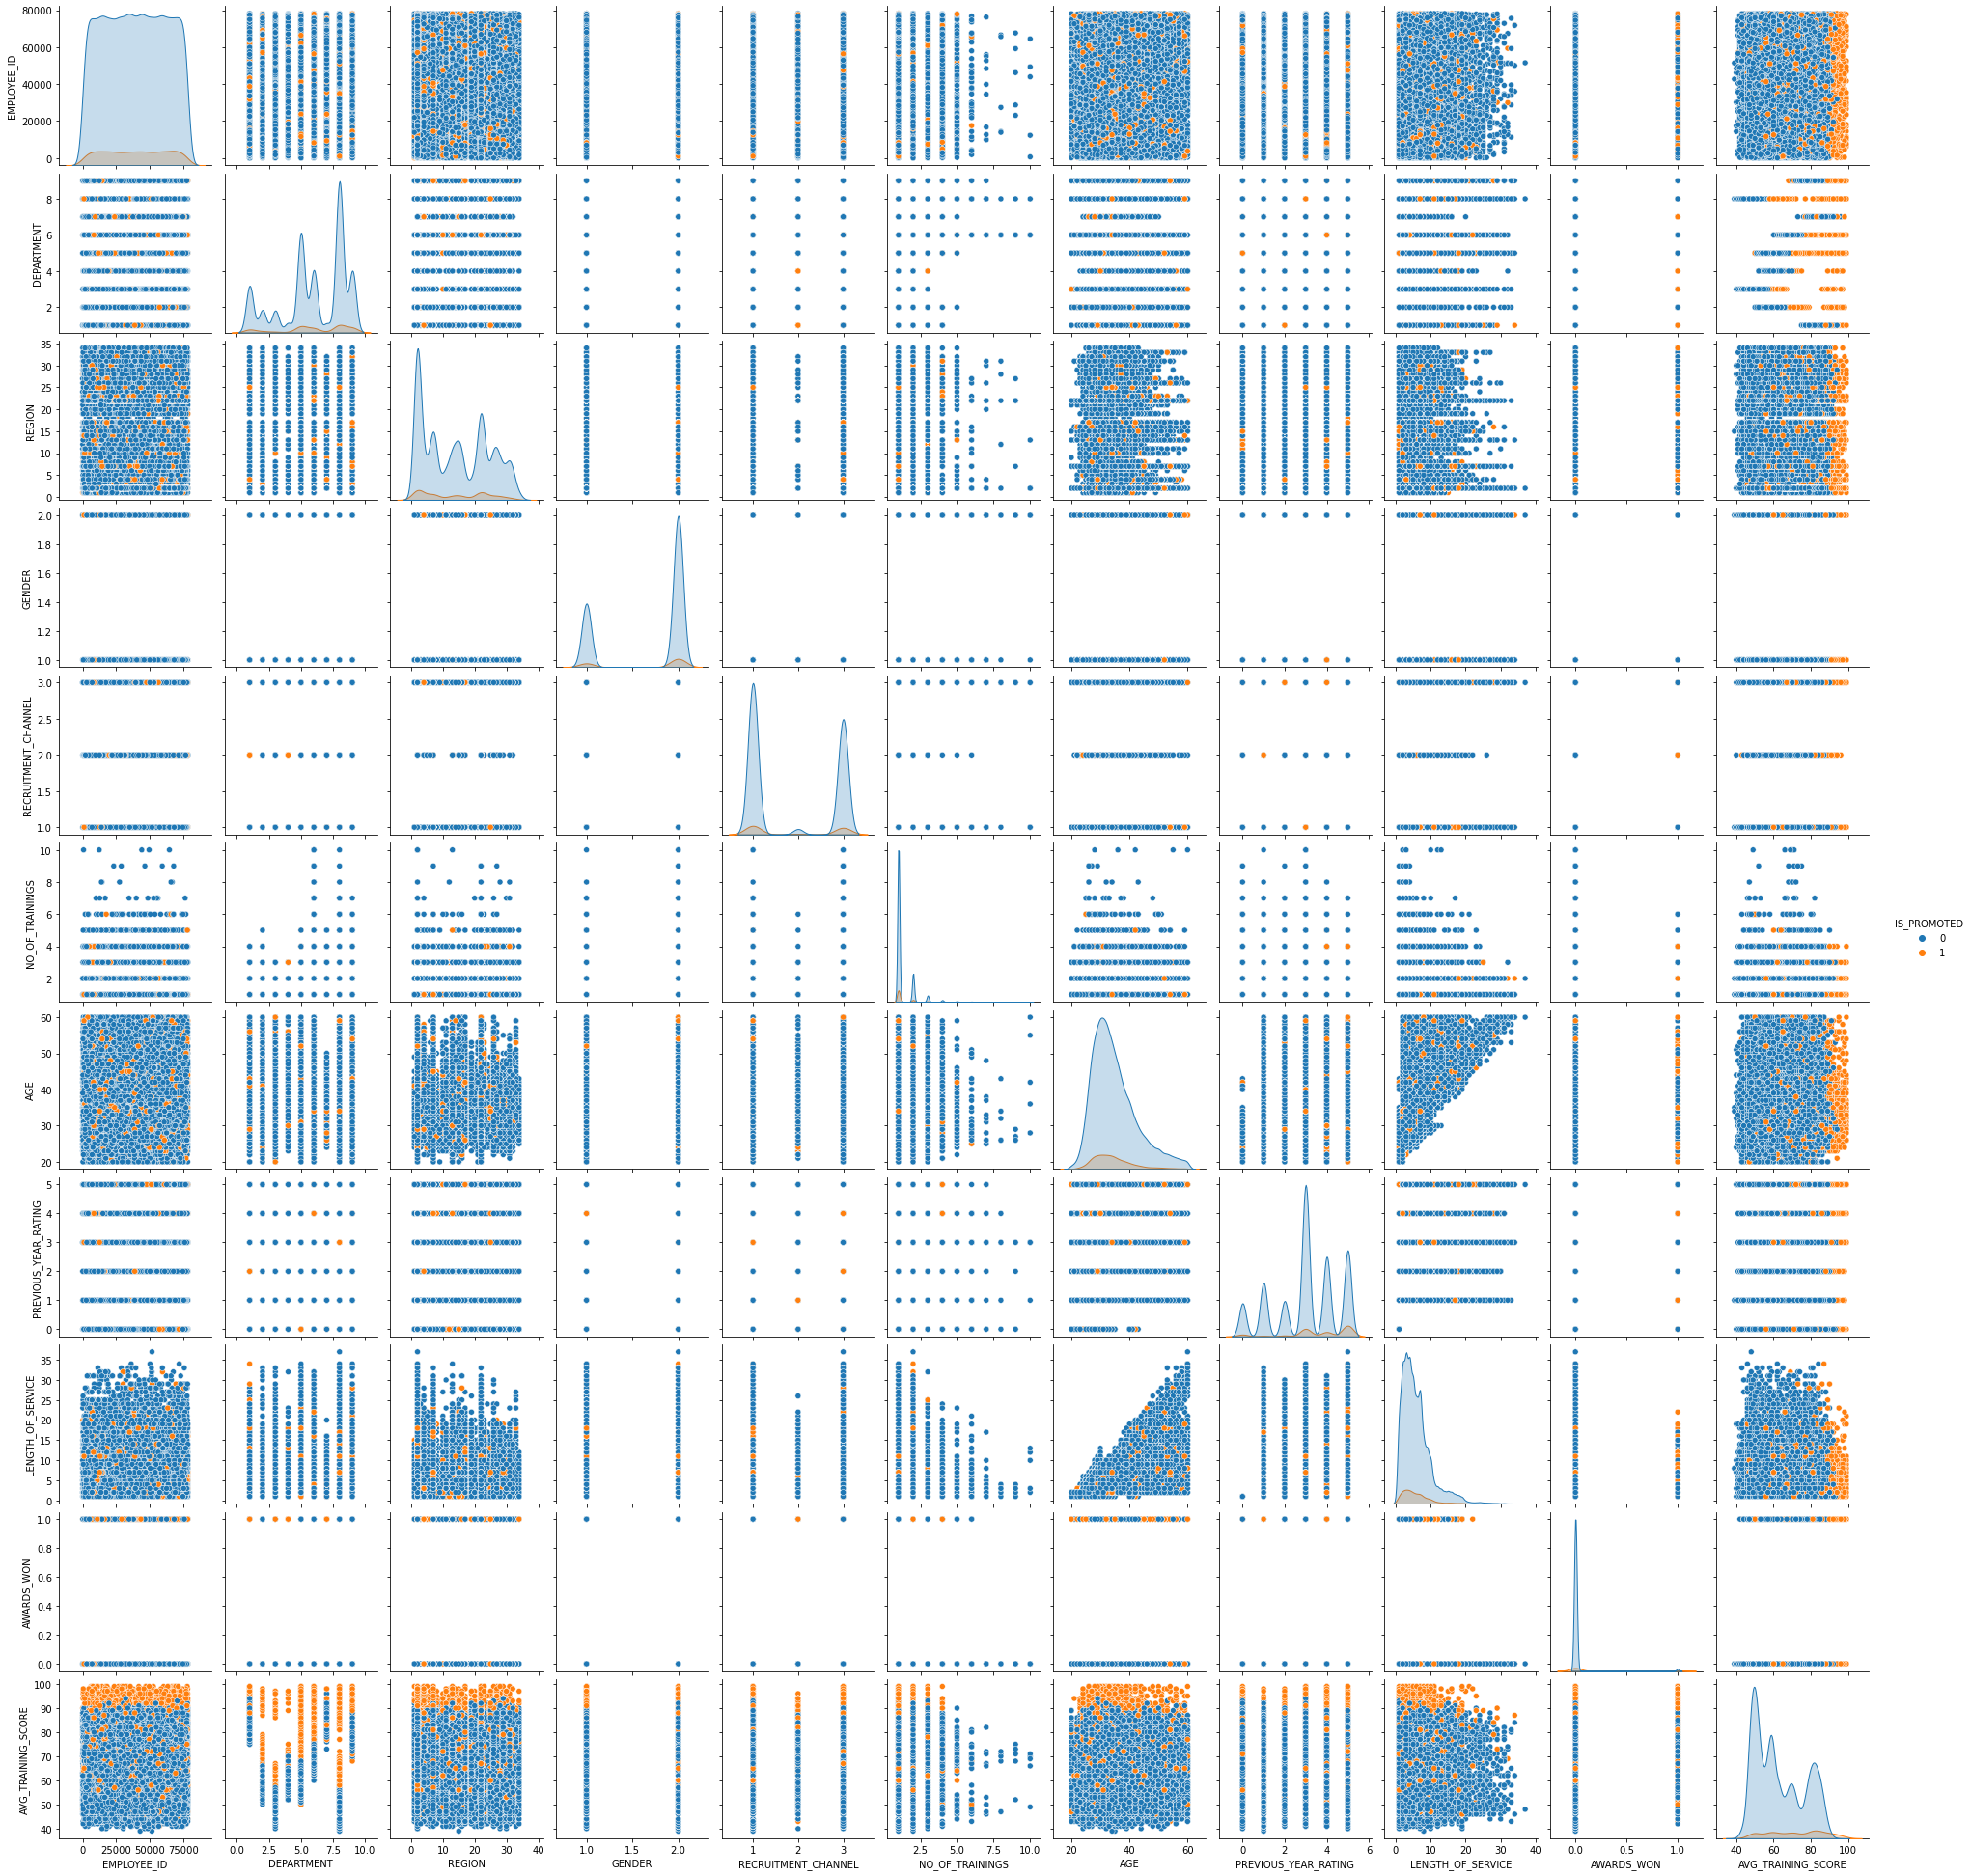

In [64]:
sns.pairplot(EmpPromotionData, hue='IS_PROMOTED')

The pairplot visualization displays similar results and observations to the earlier correlation matrix.

Reverse the earlier updates to the categorical variables back to strings rather than numbers. This is in preparation for the one-hot encoding transformation coming later.

In [65]:
EmpPromotionData.EDUCATION=EmpPromotionData.EDUCATION.replace(1, "Secondary_Level")
EmpPromotionData.EDUCATION=EmpPromotionData.EDUCATION.replace(2, "Bachelor_Level")
EmpPromotionData.EDUCATION=EmpPromotionData.EDUCATION.replace(3, "Master_Level")


EmpPromotionData.DEPARTMENT=EmpPromotionData.DEPARTMENT.replace(1, "Analytics")
EmpPromotionData.DEPARTMENT=EmpPromotionData.DEPARTMENT.replace(2, "Finance")
EmpPromotionData.DEPARTMENT=EmpPromotionData.DEPARTMENT.replace(3, "HR")
EmpPromotionData.DEPARTMENT=EmpPromotionData.DEPARTMENT.replace(4, "Legal")
EmpPromotionData.DEPARTMENT=EmpPromotionData.DEPARTMENT.replace(5, "Operations")
EmpPromotionData.DEPARTMENT=EmpPromotionData.DEPARTMENT.replace(6, "Procurement")
EmpPromotionData.DEPARTMENT=EmpPromotionData.DEPARTMENT.replace(7, "R&D")
EmpPromotionData.DEPARTMENT=EmpPromotionData.DEPARTMENT.replace(8, "Sales_&_Marketing")
EmpPromotionData.DEPARTMENT=EmpPromotionData.DEPARTMENT.replace(9, "Technology")


EmpPromotionData.GENDER=EmpPromotionData.GENDER.replace(2, "M")
EmpPromotionData.GENDER=EmpPromotionData.GENDER.replace(1, "F")

EmpPromotionData.RECRUITMENT_CHANNEL=EmpPromotionData.RECRUITMENT_CHANNEL.replace(1, "Other")
EmpPromotionData.RECRUITMENT_CHANNEL=EmpPromotionData.RECRUITMENT_CHANNEL.replace(2, "Referred")
EmpPromotionData.RECRUITMENT_CHANNEL=EmpPromotionData.RECRUITMENT_CHANNEL.replace(3, "Sourcing")

In [66]:
EmpPromotionData.IS_PROMOTED = EmpPromotionData.IS_PROMOTED.astype('category')
EmpPromotionData.AWARDS_WON = EmpPromotionData.AWARDS_WON.astype('category')
EmpPromotionData.REGION = EmpPromotionData.REGION.astype('category')
EmpPromotionData.PREVIOUS_YEAR_RATING = EmpPromotionData.PREVIOUS_YEAR_RATING.astype('category')
EmpPromotionData.NO_OF_TRAININGS = EmpPromotionData.NO_OF_TRAININGS.astype('category')

EmpPromotionData.DEPARTMENT = EmpPromotionData.DEPARTMENT.astype('category')
EmpPromotionData.GENDER = EmpPromotionData.GENDER.astype('category')
EmpPromotionData.RECRUITMENT_CHANNEL = EmpPromotionData.RECRUITMENT_CHANNEL.astype('category')

#### Define a function to plot stacked bar charts

In [67]:
### Function to plot stacked bar charts for categorical columns
def stacked_plot(x):
    sns.set(palette="nipy_spectral")
    tab1 = pd.crosstab(x, EmpPromotionData["IS_PROMOTED"], margins=True)
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(x, EmpPromotionData["IS_PROMOTED"], normalize="index")
    tab.plot(kind="bar", stacked=True, figsize=(10, 5))
    plt.legend(loc="lower left", frameon=False)
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

### IS_PROMOTED vs DEPARTMENT

IS_PROMOTED            0     1    All
DEPARTMENT                           
Analytics           4840   512   5352
Finance             2330   206   2536
HR                  2282   136   2418
Legal                986    53   1039
Operations         10325  1023  11348
Procurement         6450   688   7138
R&D                  930    69    999
Sales_&_Marketing  15627  1213  16840
Technology          6370   768   7138
All                50140  4668  54808
------------------------------------------------------------------------------------------------------------------------


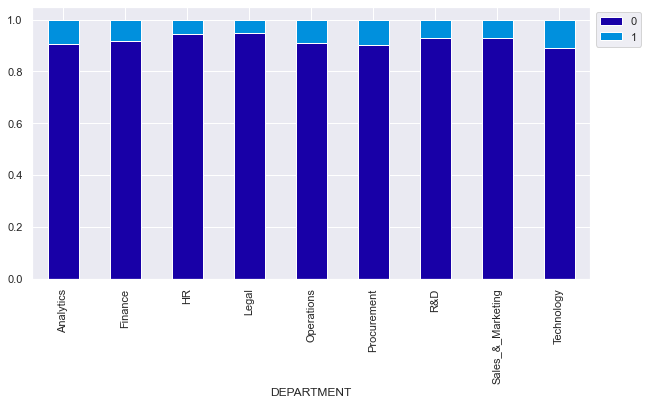

In [68]:
stacked_plot(EmpPromotionData.DEPARTMENT)

* Sales & Marketing and Operations are the top two departments with employees recommended for promotion at 1213 and 1023 respectively. 
* The Technology department has the highest within category percentage of promotions at 10.8%.

### IS_PROMOTED vs REGION

IS_PROMOTED      0     1    All
REGION                         
1              552    58    610
2            11354   989  12343
3              309    37    346
4             1457   246   1703
5              731    35    766
6              658    32    690
7             4327   516   4843
8              602    53    655
9              412     8    420
10             597    51    648
11            1241    74   1315
12             467    33    500
13            2418   230   2648
14             765    62    827
15            2586   222   2808
16            1363   102   1465
17             687   109    796
18              30     1     31
19             821    53    874
20             801    49    850
21             393    18    411
22            5694   734   6428
23            1038   137   1175
24             490    18    508
25             716   103    819
26            2117   143   2260
27            1528   131   1659
28            1164   154   1318
29             951    43    994
30      

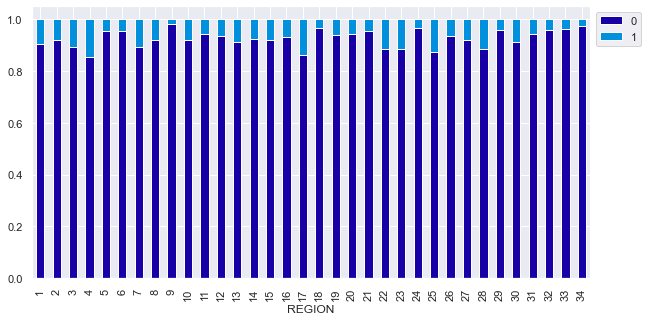

In [69]:
stacked_plot(EmpPromotionData.REGION)

* Region 2 has the highest number of employees recommended for promotion at 989.
* Second and third respectively are region 22 and region 7 with 734 and 516 respectively.
* Region 4 has the highest within category percentage of promotions at 14.4%.

### IS_PROMOTED vs EDUCATION

IS_PROMOTED          0     1    All
EDUCATION                          
Bachelor_Level   33661  3008  36669
Secondary_Level    738    67    805
Master_Level     13454  1471  14925
All              47853  4546  52399
------------------------------------------------------------------------------------------------------------------------


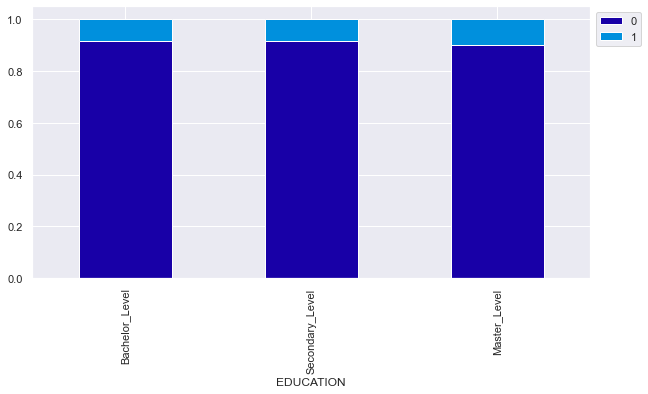

In [70]:
stacked_plot(EmpPromotionData.EDUCATION)

* 3008 employees with Bachelor's level of education form the largest number of those recommended for promotion. 
* Master's level and above educated employees have the largest within category percentage of promotion recommendations at 9.9%.

### IS_PROMOTED vs GENDER

IS_PROMOTED      0     1    All
GENDER                         
F            14845  1467  16312
M            35295  3201  38496
All          50140  4668  54808
------------------------------------------------------------------------------------------------------------------------


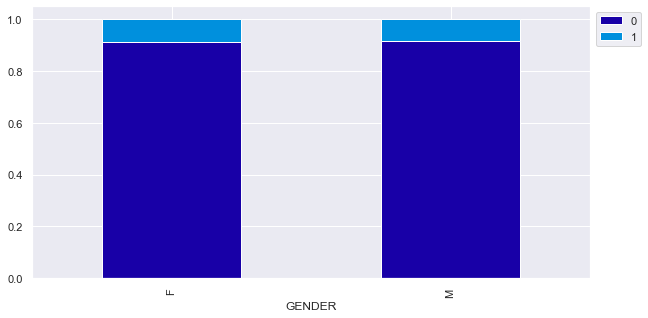

In [71]:
stacked_plot(EmpPromotionData.GENDER)

* More males are recommended for promotion at a count of 3201; however, females have a higher within category rate of promotion recommendations at approximately 9%.

### IS_PROMOTED vs RECRUITMENT_CHANNEL

IS_PROMOTED              0     1    All
RECRUITMENT_CHANNEL                    
Other                27890  2556  30446
Referred              1004   138   1142
Sourcing             21246  1974  23220
All                  50140  4668  54808
------------------------------------------------------------------------------------------------------------------------


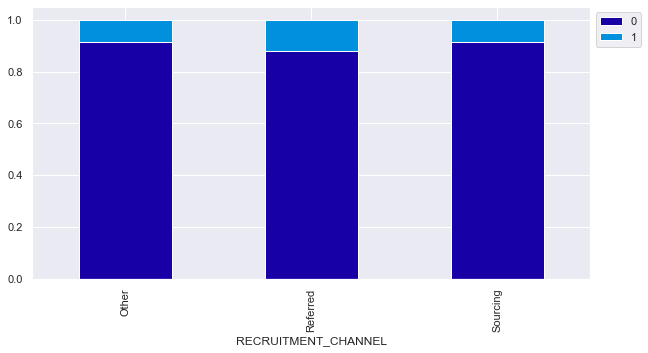

In [72]:
stacked_plot(EmpPromotionData.RECRUITMENT_CHANNEL)

* Employees recruited via the "other" recruitment channel category had the highest count of those recommended for promotion at 2556. 
* Interestingly. the "referred" category had the highest within category rates of promotion recommendations at approximately 12%.

### IS_PROMOTED vs NO_OF_TRAININGS

IS_PROMOTED          0     1    All
NO_OF_TRAININGS                    
1                40468  3910  44378
2                 7382   605   7987
3                 1654   122   1776
4                  442    26    468
5                  125     3    128
6                   42     2     44
7                   12     0     12
8                    5     0      5
9                    5     0      5
10                   5     0      5
All              50140  4668  54808
------------------------------------------------------------------------------------------------------------------------


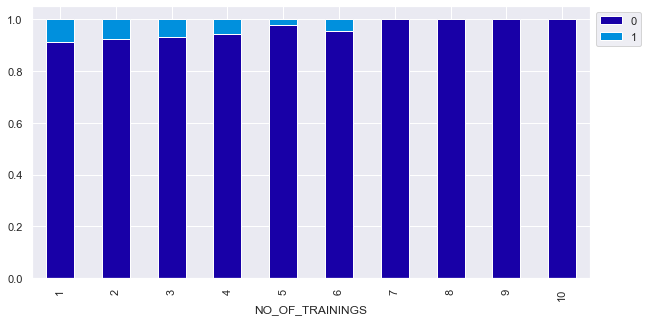

In [73]:
stacked_plot(EmpPromotionData.NO_OF_TRAININGS)

* It appears that having lots of other training in the preceding year does not have any bearing on the rates of employees recommended for promotion. 
* Employees with only 1 training had the highest count of recommendations for promotion at 3910 out of a total of 4668 (83.8%).

### IS_PROMOTED vs AGE

IS_PROMOTED      0     1    All
AGE                            
20             109     4    113
21              93     5     98
22             213    18    231
23             394    34    428
24             775    70    845
25            1230    69   1299
26            1897   163   2060
27            2566   261   2827
28            2839   308   3147
29            3111   294   3405
30            3341   324   3665
31            3224   310   3534
32            3237   297   3534
33            2891   319   3210
34            2790   286   3076
35            2428   283   2711
36            2309   208   2517
37            1981   184   2165
38            1739   184   1923
39            1534   161   1695
40            1536   127   1663
41            1185   104   1289
42            1058    91   1149
43             915    77    992
44             777    70    847
45             712    48    760
46             654    43    697
47             530    27    557
48             513    44    557
49      

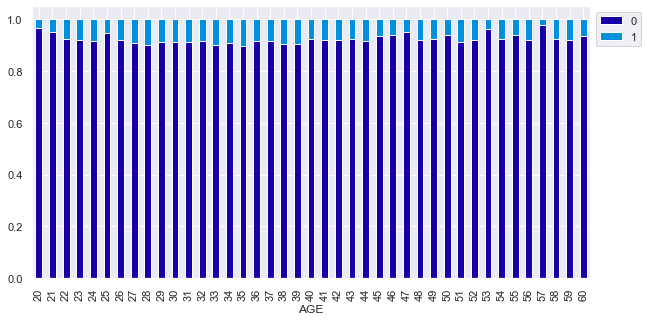

In [74]:
stacked_plot(EmpPromotionData.AGE)

* Employees aged 30, 31, and 28 had the highest counts of recommendations for promotion at 324, 310, and 308 respectively. 
* The age of 35 had the highest within category percentage of promotion recommendations at 10.5%.

### IS_PROMOTED vs PREVIOUS_YEAR_RATING

IS_PROMOTED               0     1    All
PREVIOUS_YEAR_RATING                    
0                      3785   339   4124
1                      6135    88   6223
2                      4044   181   4225
3                     17263  1355  18618
4                      9093   784   9877
5                      9820  1921  11741
All                   50140  4668  54808
------------------------------------------------------------------------------------------------------------------------


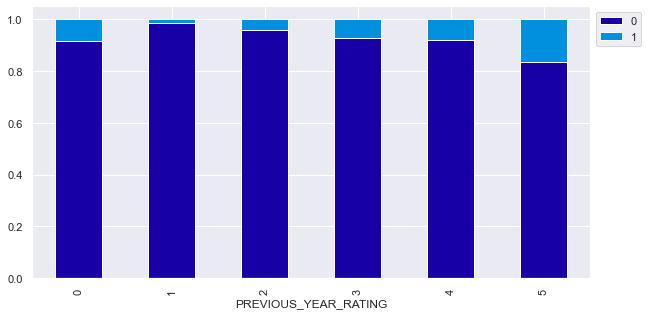

In [75]:
stacked_plot(EmpPromotionData.PREVIOUS_YEAR_RATING)

* An employee rating the previous year of 5.0, 3.0, and 4.0 had the highest number of promotion recommendations at 1921, 1355, and 784 respectively. 
* A rating of 5.0 had the highest within category percentage of employees recommended for promotion at 19.6%.

### IS_PROMOTED vs AWARDS_WON

IS_PROMOTED      0     1    All
AWARDS_WON                     
0            49429  4109  53538
1              711   559   1270
All          50140  4668  54808
------------------------------------------------------------------------------------------------------------------------


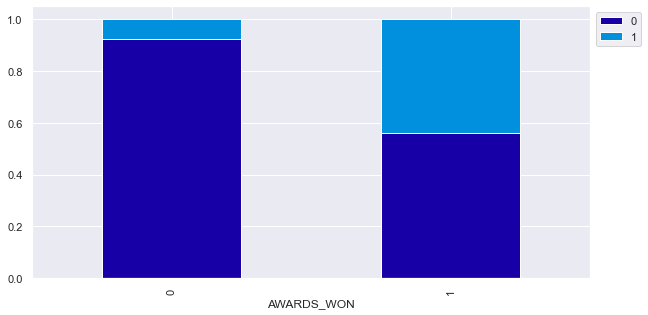

In [76]:
stacked_plot(EmpPromotionData.AWARDS_WON)

* 44% (559 out of 1270) of employees that won an award in the previous year were recommended for promotion. 
* The higher count of 4109 employees were recommended for promotion but did not win an award in the previous year compared with the 559 who did. 

### IS_PROMOTED vs AVG_TRAINING_SCORE

IS_PROMOTED             0     1    All
AVG_TRAINING_SCORE                    
39.0                    2     0      2
40.0                    5     0      5
41.0                   25     1     26
42.0                   60     2     62
43.0                  169     7    176
44.0                  325    10    335
46.0                 1100    36   1136
47.0                 1667    79   1746
48.0                 2341    96   2437
49.0                 2581   100   2681
50.0                 2604   112   2716
51.0                 2244   103   2347
52.0                 1784    72   1856
53.0                 1280    44   1324
54.0                  948    49    997
55.0                  825    47    872
56.0                 1001    69   1070
57.0                 1355    82   1437
58.0                 1768   130   1898
59.0                 1919   145   2064
60.0                 2017   138   2155
62.0                 1333   117   1450
63.0                  927    94   1021
64.0                  627

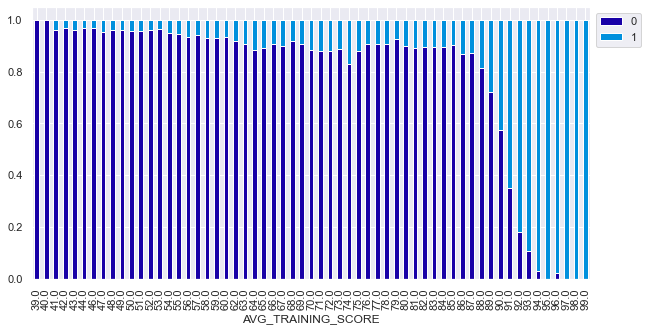

In [77]:
stacked_plot(EmpPromotionData.AVG_TRAINING_SCORE)

* An average score in current evaluations of 82.0, 81.0, and 59.0 produced counts of employees recommended for promotion of 151, 149, and 145 respectively. 
* 35 of the 35 (100%) of the employees with an average score in current evaluations of 99.0 were recommended for promotion. 

### IS_PROMOTED vs LENGTH_OF_SERVICE

IS_PROMOTED            0     1    All
LENGTH_OF_SERVICE                    
1                   4170   377   4547
2                   6089   595   6684
3                   6424   609   7033
4                   6238   598   6836
5                   5357   475   5832
6                   4333   401   4734
7                   5087   464   5551
8                   2614   269   2883
9                   2400   229   2629
10                  1989   204   2193
11                   820    96    916
12                   731    63    794
13                   633    54    687
14                   520    29    549
15                   550    43    593
16                   507    41    548
17                   406    26    432
18                   367    25    392
19                   297    32    329
20                   118    10    128
21                    74     4     78
22                    55     6     61
23                    58     7     65
24                    70     0     70
25          

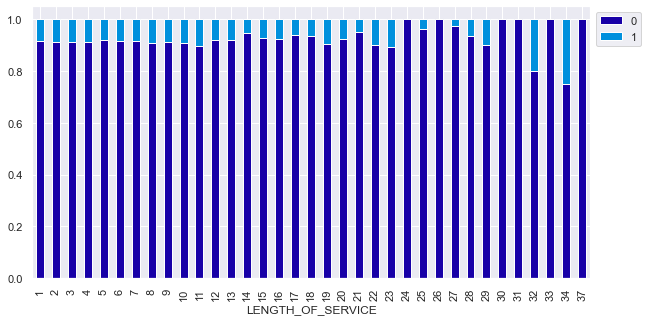

In [78]:
stacked_plot(EmpPromotionData.LENGTH_OF_SERVICE)

* Employees that have been at the company 3 years had the highest number of employees recommended for promotion at a count of 609.
* 4 years and 2 years length of service come next at counts of 598 and 595 respectively.

In [79]:
### Function to plot distributions and Boxplots of customers

def plot(x,target='IS_PROMOTED'):
    fig,axs = plt.subplots(2,2,figsize=(14,12))
    axs[0, 0].set_title(f'Distribution of {x} of employees \n who are promoted',fontsize=12,fontweight='bold')
    sns.distplot(EmpPromotionData[(EmpPromotionData[target] == 1)][x],ax=axs[0,0],color='teal')
    axs[0, 1].set_title(f"Distribution of {x} of employess \n who are not promoted",fontsize=12,fontweight='bold')
    sns.distplot(EmpPromotionData[(EmpPromotionData[target] == 0)][x],ax=axs[0,1],color='orange')
    axs[1,0].set_title(f'Boxplot of {x} w.r.t IS_PROMOTED',fontsize=12,fontweight='bold')
    
    line = plt.Line2D((.1,.9),(.5,.5), color='grey', linewidth=1.5,linestyle='--')
    fig.add_artist(line)
   
    sns.boxplot(EmpPromotionData[target],EmpPromotionData[x],ax=axs[1,0],palette='gist_rainbow',showmeans=True)
    axs[1,1].set_title(f'Boxplot of {x} w.r.t IS_PROMOTED - Without outliers',fontsize=12,fontweight='bold')
    sns.boxplot(EmpPromotionData[target],EmpPromotionData[x],ax=axs[1,1],showfliers=False,palette='gist_rainbow',showmeans=True) #turning off outliers from boxplot
    plt.tight_layout(pad=4)
    plt.show()

IS_PROMOTED vs AGE

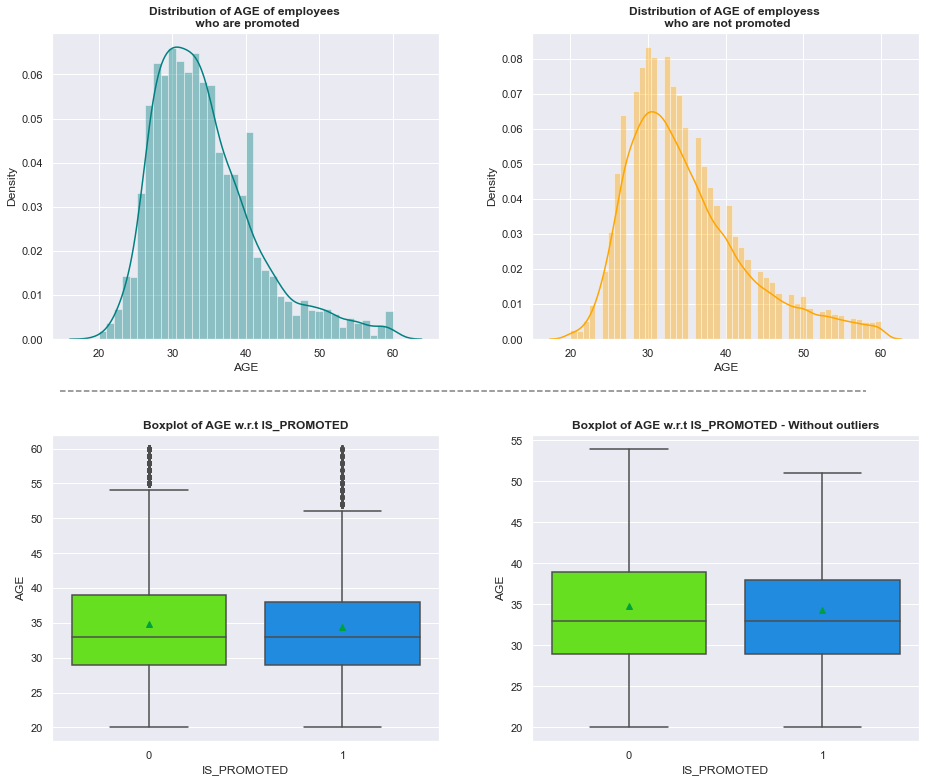

In [80]:
plot('AGE')

* Recommendations for promotions are most common from the late 20s to the middle to late 30s. 
* There are also recommendations for promotion in outlier ages rangng from the early 50s to 60.
* There is no significant difference in the age distributions of the employees recommended for promotion and those that were not. 

IS_PROMOTED vs AVG_TRAINING_SCORE

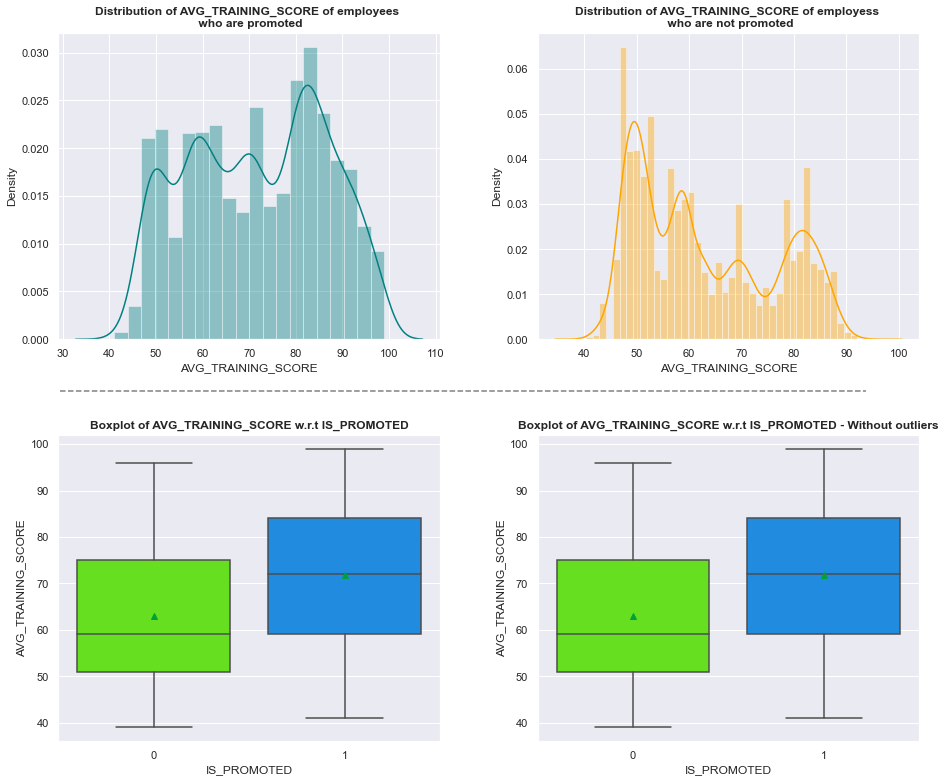

In [81]:
plot('AVG_TRAINING_SCORE')

* Employees having an average training score in current evaluations ranging from 58/59 to 83 appears to be a good indicator towards being recommended for promotion. 
* No outliers present.
* There is a difference in the average training score in current evaluations distributions between those employees that were recommended for promotion and those that were not.

IS_PROMOTED vs LENGTH_OF_SERVICE

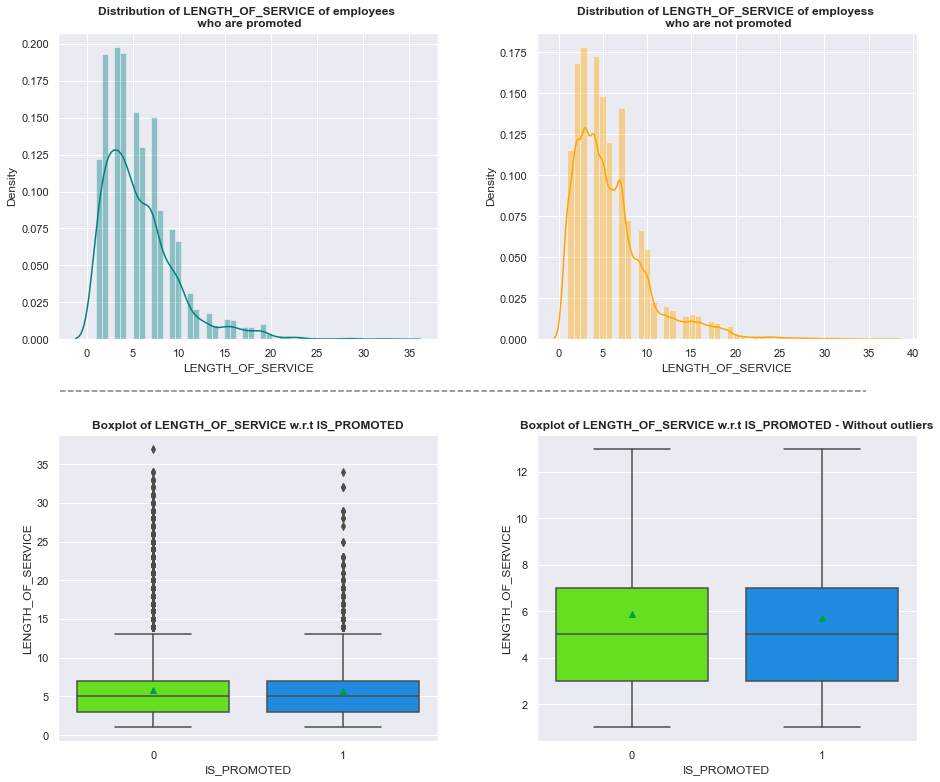

In [82]:
plot('LENGTH_OF_SERVICE')

* Recommendations for promotions are most common in employees that have been at the company 3 years, 4 years, and 2 years.
* The vast majority of recommendations for promotions are at 10 years of service and below.
* Lots of outliers 13 years and above.
* There is no significant difference in the length of service distributions of the employees recommended for promotion and those that were not. 

In [83]:
EmpPromotionData.REGION = EmpPromotionData.REGION.astype('int64')

IS_PROMOTED vs REGION

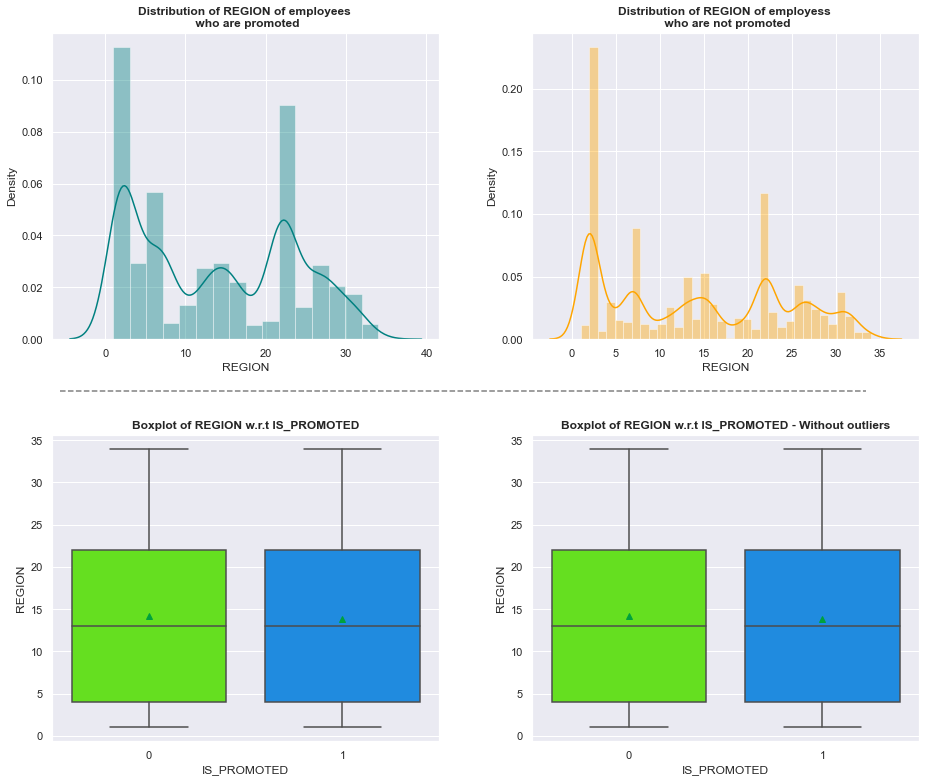

In [84]:
plot('REGION')

* Recommendations for promotions are most common in employees from regions 2, 22, and 7.
* Region 2, 22, and 7 also have the highest number of employees in total.
* No outliers.
* There is no significant difference in the region distributions of the employees recommended for promotion and those that were not. 

In [85]:
EmpPromotionData.REGION = EmpPromotionData.REGION.astype('category')

IS_PROMOTED vs GENDER

In [86]:
EmpPromotionData.GENDER=EmpPromotionData.GENDER.replace("M", 2)
EmpPromotionData.GENDER=EmpPromotionData.GENDER.replace("F", 1)

In [87]:
EmpPromotionData.GENDER = EmpPromotionData.GENDER.astype('int64')

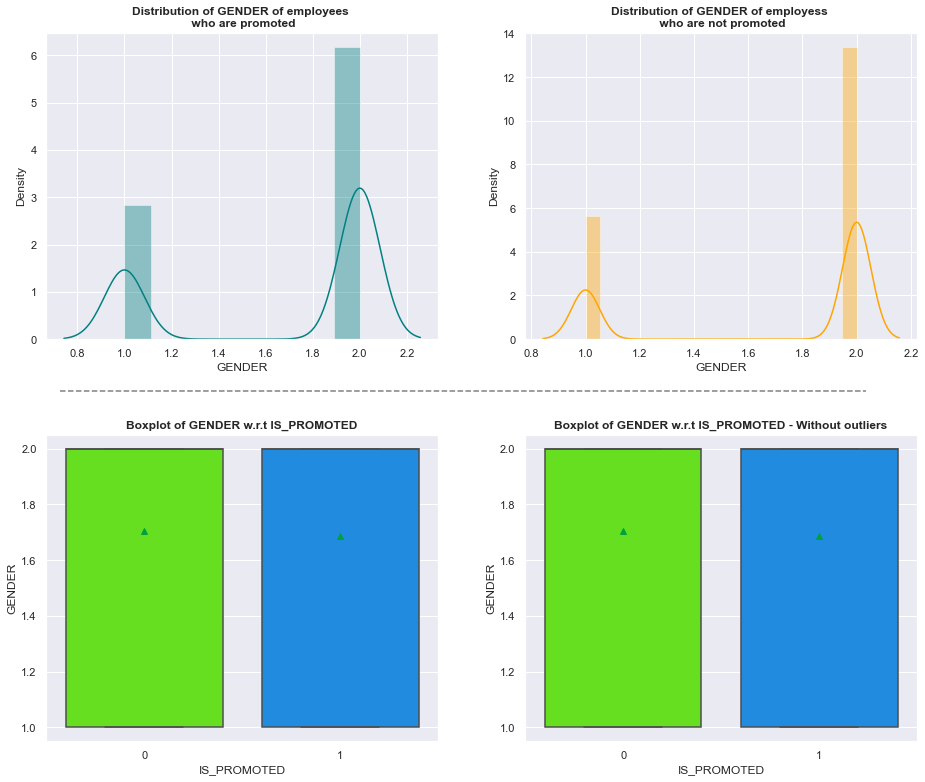

In [88]:
plot('GENDER')

* More males were recommended for promotion and there are overall more male employees at the company in general.
* There is no significant difference in the gender distribution between employees that were recommended for promotion and those that were not.

In [89]:
EmpPromotionData.GENDER=EmpPromotionData.GENDER.replace(2, "M")
EmpPromotionData.GENDER=EmpPromotionData.GENDER.replace(1, "F")

In [90]:
EmpPromotionData.GENDER = EmpPromotionData.GENDER.astype('category')

IS_PROMOTED vs DEPARTMENT

In [91]:
EmpPromotionData.DEPARTMENT=EmpPromotionData.DEPARTMENT.replace("Analytics", 1)
EmpPromotionData.DEPARTMENT=EmpPromotionData.DEPARTMENT.replace("Finance", 2)
EmpPromotionData.DEPARTMENT=EmpPromotionData.DEPARTMENT.replace("HR", 3)
EmpPromotionData.DEPARTMENT=EmpPromotionData.DEPARTMENT.replace("Legal", 4)
EmpPromotionData.DEPARTMENT=EmpPromotionData.DEPARTMENT.replace("Operations", 5)
EmpPromotionData.DEPARTMENT=EmpPromotionData.DEPARTMENT.replace("Procurement", 6)
EmpPromotionData.DEPARTMENT=EmpPromotionData.DEPARTMENT.replace("R&D", 7)
EmpPromotionData.DEPARTMENT=EmpPromotionData.DEPARTMENT.replace("Sales_&_Marketing", 8)
EmpPromotionData.DEPARTMENT=EmpPromotionData.DEPARTMENT.replace("Technology", 9)

In [92]:
EmpPromotionData.DEPARTMENT = EmpPromotionData.DEPARTMENT.astype('int64')

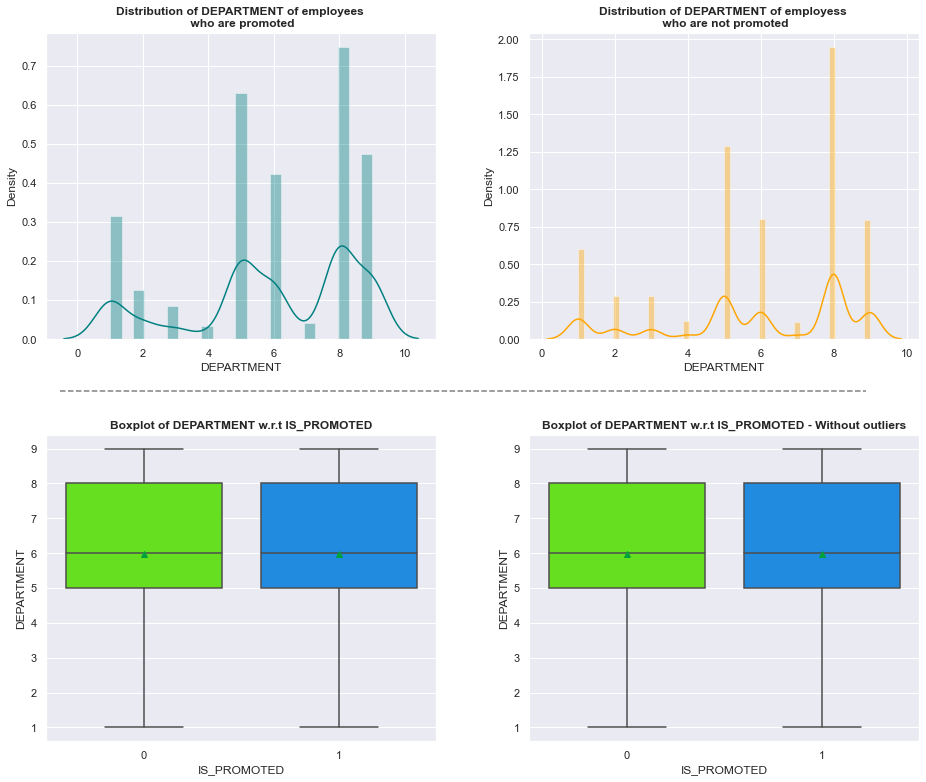

In [93]:
plot('DEPARTMENT')

* Sales and Marketing, Operations, and Technology departments had the highest, second highest, and third highest numbers of employees that were recomended for promotion.
* These three department also have the highest numbers of employees in general.
* There is no significant difference in the department distribution between employees that were recommended for promotion and those that were not.

In [94]:
EmpPromotionData.DEPARTMENT=EmpPromotionData.DEPARTMENT.replace(1, "Analytics")
EmpPromotionData.DEPARTMENT=EmpPromotionData.DEPARTMENT.replace(2, "Finance")
EmpPromotionData.DEPARTMENT=EmpPromotionData.DEPARTMENT.replace(3, "HR")
EmpPromotionData.DEPARTMENT=EmpPromotionData.DEPARTMENT.replace(4, "Legal")
EmpPromotionData.DEPARTMENT=EmpPromotionData.DEPARTMENT.replace(5, "Operations")
EmpPromotionData.DEPARTMENT=EmpPromotionData.DEPARTMENT.replace(6, "Procurement")
EmpPromotionData.DEPARTMENT=EmpPromotionData.DEPARTMENT.replace(7, "R&D")
EmpPromotionData.DEPARTMENT=EmpPromotionData.DEPARTMENT.replace(8, "Sales_&_Marketing")
EmpPromotionData.DEPARTMENT=EmpPromotionData.DEPARTMENT.replace(9, "Technology")

In [95]:
EmpPromotionData.DEPARTMENT = EmpPromotionData.DEPARTMENT.astype('category')

Percentage of outliers, in each column of the data, using the interquartile range (IQR).

In [96]:
Q1 = EmpPromotionData.quantile(0.25)             #To find the 25th percentile and 75th percentile.
Q3 = EmpPromotionData.quantile(0.75)

IQR = Q3 - Q1                           #Inter Quantile Range (75th perentile - 25th percentile)

lower=Q1-1.5*IQR                        #Finding lower and upper bounds for all values. All values outside these bounds are outliers
upper=Q3+1.5*IQR

In [97]:
((EmpPromotionData.select_dtypes(include=['float64','int64'])<lower) | (EmpPromotionData.select_dtypes(include=['float64','int64'])>upper)).sum()/len(EmpPromotionData)*100

EMPLOYEE_ID          0.000
AGE                  2.618
LENGTH_OF_SERVICE    6.366
AVG_TRAINING_SCORE   0.000
dtype: float64

**Removing the outliers**

* AGE: I am tempted to cap the age at 51 but I am concerned that this potentially creates an age discrimination bias against high performing employees older than that. There were about 191 employees in the original dataset that were recommended for promotion and over the age of 50. They are important information for our final models.
* AGE is a right skewed data pattern with outliers. The StandardScaler in Pipeline (make-pipeline) will take care of the normalization.

* LENGTH_OF_SERVICE: The outliers aboove 13 years of service can be capped too but will this potentially create a model that only predicts promotions for employees that have been at the organization for shorter lengths of time?

* LENGTH_OF_SERVICE is also right skewed in terms of the distribution of the data. The StandardScaler in Pipeline (make-pipeline) will take care of the normalization.

* AGE and LENGTH_OF_SERVICE are positively correlated at R-squared of 0.66. I am not too concerned at this point with these two independent variables having a correlation as it is below R-squared of 0.75/0.80. Both variables will be left intact and as-is at this stage.

## Data Preparation

Drop the EMPLOYEE_ID variable as it does not add any value to the model that is being built to predict promotion recommendations for employees. 

In [98]:
EmpPromotionData.drop(columns="EMPLOYEE_ID", axis=1, inplace=True)


In [99]:
EmpPromotionData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   DEPARTMENT            54808 non-null  category
 1   REGION                54808 non-null  category
 2   EDUCATION             52399 non-null  category
 3   GENDER                54808 non-null  category
 4   RECRUITMENT_CHANNEL   54808 non-null  category
 5   NO_OF_TRAININGS       54808 non-null  category
 6   AGE                   54808 non-null  int64   
 7   PREVIOUS_YEAR_RATING  54808 non-null  category
 8   LENGTH_OF_SERVICE     54808 non-null  int64   
 9   AWARDS_WON            54808 non-null  category
 10  AVG_TRAINING_SCORE    52248 non-null  float64 
 11  IS_PROMOTED           54808 non-null  category
dtypes: category(9), float64(1), int64(2)
memory usage: 1.7 MB


**Split the data into train and test sets** 

**Missing Values**

In [100]:
EmpPromotionData.isna().sum()

DEPARTMENT                 0
REGION                     0
EDUCATION               2409
GENDER                     0
RECRUITMENT_CHANNEL        0
NO_OF_TRAININGS            0
AGE                        0
PREVIOUS_YEAR_RATING       0
LENGTH_OF_SERVICE          0
AWARDS_WON                 0
AVG_TRAINING_SCORE      2560
IS_PROMOTED                0
dtype: int64

PREVIOUS_YEAR_RATING also has 4124 missing records that are currently represented by zeros.

In [101]:
# Replace zeros with 3, the median value in PREVIOUS_YEAR_RATING.
EmpPromotionData.PREVIOUS_YEAR_RATING=EmpPromotionData.PREVIOUS_YEAR_RATING.replace(0, 3)

In [102]:
EmpPromotionData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   DEPARTMENT            54808 non-null  category
 1   REGION                54808 non-null  category
 2   EDUCATION             52399 non-null  category
 3   GENDER                54808 non-null  category
 4   RECRUITMENT_CHANNEL   54808 non-null  category
 5   NO_OF_TRAININGS       54808 non-null  category
 6   AGE                   54808 non-null  int64   
 7   PREVIOUS_YEAR_RATING  54808 non-null  category
 8   LENGTH_OF_SERVICE     54808 non-null  int64   
 9   AWARDS_WON            54808 non-null  category
 10  AVG_TRAINING_SCORE    52248 non-null  float64 
 11  IS_PROMOTED           54808 non-null  category
dtypes: category(9), float64(1), int64(2)
memory usage: 1.7 MB


In [103]:
EmpPromotionData.isna().sum()

DEPARTMENT                 0
REGION                     0
EDUCATION               2409
GENDER                     0
RECRUITMENT_CHANNEL        0
NO_OF_TRAININGS            0
AGE                        0
PREVIOUS_YEAR_RATING       0
LENGTH_OF_SERVICE          0
AWARDS_WON                 0
AVG_TRAINING_SCORE      2560
IS_PROMOTED                0
dtype: int64

**Missing Value Treatment With K-Nearest Neighbors (KNN) Imputation Method**

  * I will use KNN imputer to impute missing values.
  *  KNNImputer: Each sample's missing values are imputed by looking at the n_neighbors nearest neighbors found in the training set. Default value for n_neighbors=5.
  * KNN imputer replaces missing values using the average of k nearest non-missing feature values.
  * Nearest points are found based on euclidean distance.


In [104]:
imputer = KNNImputer(n_neighbors=5)

In [105]:
reqd_col_for_impute = ['EDUCATION','AVG_TRAINING_SCORE','PREVIOUS_YEAR_RATING','RECRUITMENT_CHANNEL',
                       'NO_OF_TRAININGS','AWARDS_WON','AGE','LENGTH_OF_SERVICE','DEPARTMENT','REGION']


In [106]:
EmpPromotionData[reqd_col_for_impute].head(50)

,EDUCATION,AVG_TRAINING_SCORE,PREVIOUS_YEAR_RATING,RECRUITMENT_CHANNEL,NO_OF_TRAININGS,AWARDS_WON,AGE,LENGTH_OF_SERVICE,DEPARTMENT,REGION
0,Master_Level,49.000,5,Sourcing,1,0,35,8,Sales_&_Marketing,7
1,Bachelor_Level,60.000,5,Other,1,0,30,4,Operations,22
2,Bachelor_Level,50.000,3,Sourcing,1,0,34,7,Sales_&_Marketing,19
3,Bachelor_Level,50.000,1,Other,2,0,39,10,Sales_&_Marketing,23
4,Bachelor_Level,73.000,3,Other,1,0,45,2,Technology,26
5,Bachelor_Level,85.000,3,Sourcing,2,0,31,7,Analytics,2
6,Bachelor_Level,59.000,3,Other,1,0,31,5,Operations,20
7,Master_Level,63.000,3,Sourcing,1,0,33,6,Operations,34
8,Bachelor_Level,83.000,4,Other,1,0,28,5,Analytics,20
9,Master_Level,54.000,5,Sourcing,1,0,32,5,Sales_&_Marketing,1


In [107]:
EmpPromotionData[reqd_col_for_impute].tail(50)

,EDUCATION,AVG_TRAINING_SCORE,PREVIOUS_YEAR_RATING,RECRUITMENT_CHANNEL,NO_OF_TRAININGS,AWARDS_WON,AGE,LENGTH_OF_SERVICE,DEPARTMENT,REGION
54758,Bachelor_Level,62.000,4,Sourcing,1,0,43,13,Finance,2
54759,Master_Level,51.000,1,Other,3,0,35,10,Sales_&_Marketing,7
54760,Bachelor_Level,56.000,2,Other,1,0,27,4,Finance,22
54761,Bachelor_Level,86.000,4,Sourcing,1,0,30,2,Procurement,13
54762,Master_Level,69.000,2,Other,1,0,36,2,Procurement,2
54763,Bachelor_Level,56.000,5,Sourcing,1,0,36,8,Operations,13
54764,Bachelor_Level,47.000,1,Sourcing,1,0,46,4,Sales_&_Marketing,22
54765,Bachelor_Level,48.000,1,Other,2,0,33,3,Sales_&_Marketing,2
54766,Bachelor_Level,55.000,3,Sourcing,1,0,37,3,Operations,32
54767,Bachelor_Level,47.000,4,Other,1,0,49,5,Sales_&_Marketing,16


In [108]:
EmpPromotionData2=EmpPromotionData.copy()

I will pass numerical values for each categorical column for the KNN imputation operation via label encoding.

In [109]:
# EDUCATION variable 

education = {'Secondary_Level':1,'Bachelor_Level':2,'Master_Level':3}

# RECRUITMENT_CHANNEL variable

recruitment_channel = {'Other':1,'Referred':2,'Sourcing':3}

# DEPARTMENT variable 

department = {'Analytics':1,'Finance':2,'HR':3,'Legal':4,'Operations':5,'Procurement':6,'R&D':7,'Sales_&_Marketing':8,'Technology':9}

# GENDER variable

gender = {'M':2,'F':1}


In [110]:
EmpPromotionData2['EDUCATION'] = EmpPromotionData2['EDUCATION'].map(education)
EmpPromotionData2['RECRUITMENT_CHANNEL'] = EmpPromotionData2['RECRUITMENT_CHANNEL'].map(recruitment_channel)
EmpPromotionData2['DEPARTMENT'] = EmpPromotionData2['DEPARTMENT'].map(department)
EmpPromotionData2['GENDER'] = EmpPromotionData2['GENDER'].map(gender)

In [111]:
EmpPromotionData2.head(50)

,DEPARTMENT,REGION,EDUCATION,GENDER,RECRUITMENT_CHANNEL,NO_OF_TRAININGS,AGE,PREVIOUS_YEAR_RATING,LENGTH_OF_SERVICE,AWARDS_WON,AVG_TRAINING_SCORE,IS_PROMOTED
0,8,7,3,1,3,1,35,5,8,0,49.000,0
1,5,22,2,2,1,1,30,5,4,0,60.000,0
2,8,19,2,2,3,1,34,3,7,0,50.000,0
3,8,23,2,2,1,2,39,1,10,0,50.000,0
4,9,26,2,2,1,1,45,3,2,0,73.000,0
5,1,2,2,2,3,2,31,3,7,0,85.000,0
6,5,20,2,1,1,1,31,3,5,0,59.000,0
7,5,34,3,2,3,1,33,3,6,0,63.000,0
8,1,20,2,2,1,1,28,4,5,0,83.000,0
9,8,1,3,2,3,1,32,5,5,0,54.000,0


* Values have all been encoded.

In [112]:
# Separating target variable and other variables
X = EmpPromotionData2.drop(columns="IS_PROMOTED")
y = EmpPromotionData2["IS_PROMOTED"]

In [113]:
# Splitting data into training, validation and test set.
# The first step is to split the data into 2 parts, temporary (X_temp) and test (X_test).

X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1, stratify=y
)

# Next we split the temporary set into train (X_train) and validation (X_val).

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=1, stratify=y_temp
)
print(X_train.shape, X_val.shape, X_test.shape)

(32884, 11) (10962, 11) (10962, 11)


In [114]:
# Fit and transform the train data
X_train[reqd_col_for_impute] = imputer.fit_transform(X_train[reqd_col_for_impute])

# Transform the validation data
X_val[reqd_col_for_impute] = imputer.fit_transform(X_val[reqd_col_for_impute])

# Transform the test data
X_test[reqd_col_for_impute] = imputer.transform(X_test[reqd_col_for_impute])

In [115]:
# Checking that no column has missing values in train, val, or test sets
print(X_train.isna().sum())
print("-" * 30)
print(X_val.isna().sum())
print("-" * 30)
print(X_test.isna().sum())

DEPARTMENT              0
REGION                  0
EDUCATION               0
GENDER                  0
RECRUITMENT_CHANNEL     0
NO_OF_TRAININGS         0
AGE                     0
PREVIOUS_YEAR_RATING    0
LENGTH_OF_SERVICE       0
AWARDS_WON              0
AVG_TRAINING_SCORE      0
dtype: int64
------------------------------
DEPARTMENT              0
REGION                  0
EDUCATION               0
GENDER                  0
RECRUITMENT_CHANNEL     0
NO_OF_TRAININGS         0
AGE                     0
PREVIOUS_YEAR_RATING    0
LENGTH_OF_SERVICE       0
AWARDS_WON              0
AVG_TRAINING_SCORE      0
dtype: int64
------------------------------
DEPARTMENT              0
REGION                  0
EDUCATION               0
GENDER                  0
RECRUITMENT_CHANNEL     0
NO_OF_TRAININGS         0
AGE                     0
PREVIOUS_YEAR_RATING    0
LENGTH_OF_SERVICE       0
AWARDS_WON              0
AVG_TRAINING_SCORE      0
dtype: int64


* All missing values have been treated.
* Inverse map the encoded values.



In [116]:
## Function to inverse the encoding
def inverse_mapping(x,y):
    inv_dict = {v: k for k, v in x.items()}
    X_train[y] = np.round(X_train[y]).map(inv_dict).astype('category')
    X_val[y] = np.round(X_val[y]).map(inv_dict).astype('category')
    X_test[y] = np.round(X_test[y]).map(inv_dict).astype('category')


In [117]:
inverse_mapping(education,'EDUCATION')
inverse_mapping(recruitment_channel,'RECRUITMENT_CHANNEL')
inverse_mapping(department,'DEPARTMENT')
#inverse_mapping(gender,'GENDER') # leave the GENDER variable as a numeric version of "M" and "F" as 2 and 1 respectively.

Checking inverse mapped values/categories.

In [118]:
# Confirm that the column labels in X_train for the category variables all look as they should be.
cols = X_train.select_dtypes(include=['object','category'])
for i in cols.columns:
    print(X_train[i].value_counts())
    print('*'*30)

Sales_&_Marketing    9989
Operations           6746
Technology           4383
Procurement          4330
Analytics            3173
Finance              1570
HR                   1482
R&D                   613
Legal                 598
Name: DEPARTMENT, dtype: int64
******************************
Bachelor_Level     23403
Master_Level        8983
Secondary_Level      498
Name: EDUCATION, dtype: int64
******************************
2    22989
1     9895
Name: GENDER, dtype: int64
******************************
Other       18260
Sourcing    13942
Referred      682
Name: RECRUITMENT_CHANNEL, dtype: int64
******************************


In [119]:
# Confirm that the column labels in X_test for the category variables all look as they should be.
cols = X_test.select_dtypes(include=['object','category'])
for i in cols.columns:
    print(X_test[i].value_counts())
    print('*'*30)

Sales_&_Marketing    3397
Operations           2287
Procurement          1416
Technology           1391
Analytics            1107
Finance               481
HR                    480
Legal                 214
R&D                   189
Name: DEPARTMENT, dtype: int64
******************************
Bachelor_Level     7715
Master_Level       3086
Secondary_Level     161
Name: EDUCATION, dtype: int64
******************************
2    7698
1    3264
Name: GENDER, dtype: int64
******************************
Other       6113
Sourcing    4612
Referred     237
Name: RECRUITMENT_CHANNEL, dtype: int64
******************************


In [120]:
# Confirm that the column labels in X_val for the category variables all look as they should be.
cols = X_val.select_dtypes(include=['object','category'])
for i in cols.columns:
    print(X_val[i].value_counts())
    print('*'*30)

Sales_&_Marketing    3454
Operations           2315
Procurement          1392
Technology           1364
Analytics            1072
Finance               485
HR                    456
Legal                 227
R&D                   197
Name: DEPARTMENT, dtype: int64
******************************
Bachelor_Level     7700
Master_Level       3091
Secondary_Level     171
Name: EDUCATION, dtype: int64
******************************
2    7809
1    3153
Name: GENDER, dtype: int64
******************************
Other       6073
Sourcing    4666
Referred     223
Name: RECRUITMENT_CHANNEL, dtype: int64
******************************


* Inverse mapping returned original labels

**End of Missing Values Imputation**

### Encoding categorical variables

In [121]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32884 entries, 24986 to 13538
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   DEPARTMENT            32884 non-null  category
 1   REGION                32884 non-null  float64 
 2   EDUCATION             32884 non-null  category
 3   GENDER                32884 non-null  category
 4   RECRUITMENT_CHANNEL   32884 non-null  category
 5   NO_OF_TRAININGS       32884 non-null  float64 
 6   AGE                   32884 non-null  float64 
 7   PREVIOUS_YEAR_RATING  32884 non-null  float64 
 8   LENGTH_OF_SERVICE     32884 non-null  float64 
 9   AWARDS_WON            32884 non-null  float64 
 10  AVG_TRAINING_SCORE    32884 non-null  float64 
dtypes: category(4), float64(7)
memory usage: 2.1 MB


In [122]:
X_val.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10962 entries, 19208 to 9664
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   DEPARTMENT            10962 non-null  category
 1   REGION                10962 non-null  float64 
 2   EDUCATION             10962 non-null  category
 3   GENDER                10962 non-null  category
 4   RECRUITMENT_CHANNEL   10962 non-null  category
 5   NO_OF_TRAININGS       10962 non-null  float64 
 6   AGE                   10962 non-null  float64 
 7   PREVIOUS_YEAR_RATING  10962 non-null  float64 
 8   LENGTH_OF_SERVICE     10962 non-null  float64 
 9   AWARDS_WON            10962 non-null  float64 
 10  AVG_TRAINING_SCORE    10962 non-null  float64 
dtypes: category(4), float64(7)
memory usage: 728.6 KB


In [123]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10962 entries, 14959 to 20601
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   DEPARTMENT            10962 non-null  category
 1   REGION                10962 non-null  float64 
 2   EDUCATION             10962 non-null  category
 3   GENDER                10962 non-null  category
 4   RECRUITMENT_CHANNEL   10962 non-null  category
 5   NO_OF_TRAININGS       10962 non-null  float64 
 6   AGE                   10962 non-null  float64 
 7   PREVIOUS_YEAR_RATING  10962 non-null  float64 
 8   LENGTH_OF_SERVICE     10962 non-null  float64 
 9   AWARDS_WON            10962 non-null  float64 
 10  AVG_TRAINING_SCORE    10962 non-null  float64 
dtypes: category(4), float64(7)
memory usage: 728.6 KB


In [124]:
# Converting the GENDER variable to integer so that the get.dummies 
# function does not encode it and drop 1 of the only 2 values.

X_train.GENDER = X_train.GENDER.astype('int64')
X_val.GENDER = X_val.GENDER.astype('int64')
X_test.GENDER = X_test.GENDER.astype('int64')

In [125]:
X_train = pd.get_dummies(X_train, drop_first=True)
X_val = pd.get_dummies(X_val, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)
print(X_train.shape, X_val.shape, X_test.shape)

(32884, 20) (10962, 20) (10962, 20)


* After encoding there are 20 columns.

In [126]:
X_train.info() # display the encoded columns in X_train

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32884 entries, 24986 to 13538
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   REGION                        32884 non-null  float64
 1   GENDER                        32884 non-null  int64  
 2   NO_OF_TRAININGS               32884 non-null  float64
 3   AGE                           32884 non-null  float64
 4   PREVIOUS_YEAR_RATING          32884 non-null  float64
 5   LENGTH_OF_SERVICE             32884 non-null  float64
 6   AWARDS_WON                    32884 non-null  float64
 7   AVG_TRAINING_SCORE            32884 non-null  float64
 8   DEPARTMENT_Finance            32884 non-null  uint8  
 9   DEPARTMENT_HR                 32884 non-null  uint8  
 10  DEPARTMENT_Legal              32884 non-null  uint8  
 11  DEPARTMENT_Operations         32884 non-null  uint8  
 12  DEPARTMENT_Procurement        32884 non-null  uint8  
 1

In [127]:
X_test.info() # display the encoded columns in X_test

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10962 entries, 14959 to 20601
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   REGION                        10962 non-null  float64
 1   GENDER                        10962 non-null  int64  
 2   NO_OF_TRAININGS               10962 non-null  float64
 3   AGE                           10962 non-null  float64
 4   PREVIOUS_YEAR_RATING          10962 non-null  float64
 5   LENGTH_OF_SERVICE             10962 non-null  float64
 6   AWARDS_WON                    10962 non-null  float64
 7   AVG_TRAINING_SCORE            10962 non-null  float64
 8   DEPARTMENT_Finance            10962 non-null  uint8  
 9   DEPARTMENT_HR                 10962 non-null  uint8  
 10  DEPARTMENT_Legal              10962 non-null  uint8  
 11  DEPARTMENT_Operations         10962 non-null  uint8  
 12  DEPARTMENT_Procurement        10962 non-null  uint8  
 1

In [128]:
X_val.info() # display the encoded columns in X_val

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10962 entries, 19208 to 9664
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   REGION                        10962 non-null  float64
 1   GENDER                        10962 non-null  int64  
 2   NO_OF_TRAININGS               10962 non-null  float64
 3   AGE                           10962 non-null  float64
 4   PREVIOUS_YEAR_RATING          10962 non-null  float64
 5   LENGTH_OF_SERVICE             10962 non-null  float64
 6   AWARDS_WON                    10962 non-null  float64
 7   AVG_TRAINING_SCORE            10962 non-null  float64
 8   DEPARTMENT_Finance            10962 non-null  uint8  
 9   DEPARTMENT_HR                 10962 non-null  uint8  
 10  DEPARTMENT_Legal              10962 non-null  uint8  
 11  DEPARTMENT_Operations         10962 non-null  uint8  
 12  DEPARTMENT_Procurement        10962 non-null  uint8  
 13

## Building the Model(s)

## Model evaluation criterion

### Model can make wrong predictions as:
1. Predicting an employee will be recommended for promotion and the employee is not recommended for promotion.
2. Predicting an employee will not be recommended for promotion and the employee is recommended for promotion.

### Which case is more important? 
* Predicting an employee will not be recommended for promotion and the employee is recommended for promotion i.e. not being able to accurately identify high performing employees as soon as possible.

### How to reduce this loss i.e need to reduce False Negatives?
* Likoma company would want `Recall` to be maximized, greater the Recall higher the chances of minimizing false negatives. Hence, the focus should be on increasing Recall or minimizing the false negatives or in other words identifying the true positives(i.e. Class 1) so that the organization can grow from strength to strength by correctly identifying productive employees that perform well and are recommended for promotion.

**I will create two functions to calculate different metrics as well as a  confusion matrix. This will reduce redundancy so that the same code is not used repeatedly for each model.**

In [129]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1 Score": f1,
        },
        index=[0],
    )

    return df_perf

In [130]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

## Model Building

In [131]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Logistic Regression", LogisticRegression(random_state=1)))
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random Forest", RandomForestClassifier(random_state=1)))
models.append(("GradientBoost", GradientBoostingClassifier(random_state=1)))
models.append(("AdaBoost", AdaBoostClassifier(random_state=1)))
models.append(("XGBoost", XGBClassifier(random_state=1, eval_metric="logloss")))
models.append(("DTree", DecisionTreeClassifier(random_state=1)))

results1 = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models


# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation Performance Scores:" "\n")

for name, model in models:
    scoring = "recall"
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train, y=y_train, scoring=scoring, cv=kfold
    )
    results1.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean() * 100))

print("\n" "Validation Performance Scores:" "\n")

for name, model in models:
    model.fit(X_train, y_train)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores * 100))


Cross-Validation Performance Scores:

Logistic Regression: 10.107142857142856
Bagging: 31.178571428571423
Random Forest: 25.928571428571427
GradientBoost: 27.928571428571423
AdaBoost: 16.178571428571427
XGBoost: 31.285714285714285
DTree: 37.10714285714285

Validation Performance Scores:

Logistic Regression: 11.670235546038544
Bagging: 31.156316916488226
Random Forest: 26.552462526766597
GradientBoost: 28.37259100642398
AdaBoost: 15.952890792291221
XGBoost: 32.33404710920771
DTree: 38.22269807280514


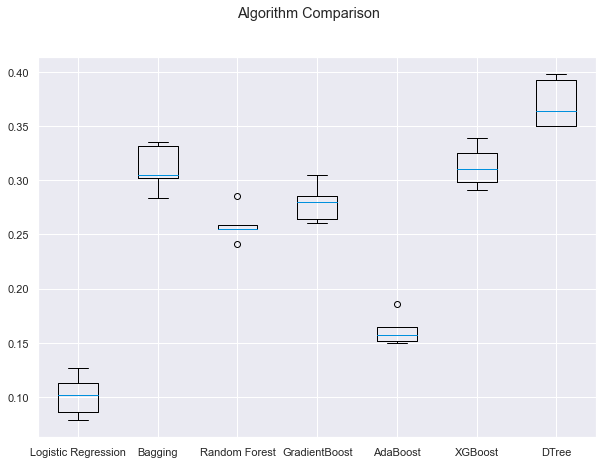

In [132]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results1)
ax.set_xticklabels(names)

plt.show()

### Performance comparison

- The Recall scores are not strong in general and can be improved upon.
- Decision Tree has the best performance followed by Bagging.
- GradientBoost comes in third with Random Forest (with two outliers) coming in fourth place.
- Performance of XGBoost at this point puts it in fifth place and sixth place AdaBoost has one outlier.
- Bagging generally focuses on improving Accuracy at the expense of interpretability and one cannot easily interprete which features are being selected; therefore, for this analysis I will not be moving any further with Bagging.
- Random Forest: Decision Trees are incorporated within some of the other Boosting models, so I will leave that to one side at this point.
- Boosting is resilient and curbs overfitting is also versatile and can be applied to a variety of problems. It is also robust to outliers, handles mixed predictors well and is focused on reducing bias.
- I will tune XGBoost, AdaBoost, and GradientBoost classifiers.

# Hyperparameter Tuning

## Tuning XGBoost

In [133]:
%%time 

# defining model
Model = XGBClassifier(random_state=1,eval_metric='logloss')

#Parameter grid to pass in RandomSearchCV
param_grid={'n_estimators':np.arange(50,300,50),'scale_pos_weight':[0,1,2,5,10],
            'learning_rate':[0.01,0.1,0.2,0.05], 'gamma':[0,1,3,5],
            'subsample':[0.7,0.8,0.9,1]
           }
from sklearn import metrics

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.7, 'scale_pos_weight': 10, 'n_estimators': 150, 'learning_rate': 0.05, 'gamma': 3} with CV score=0.5785714285714286:
CPU times: user 35.9 s, sys: 3.1 s, total: 39 s
Wall time: 15min 39s


In [134]:
tuned_xgb1 = XGBClassifier(
    random_state=1,
    eval_metric="logloss",
    subsample=0.7,
    scale_pos_weight=10,
    n_estimators=150,
    learning_rate=0.05,
    gamma=3,
)
tuned_xgb1.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=3, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.05, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=150, n_jobs=8,
              num_parallel_tree=1, random_state=1, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=10, subsample=0.7, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [135]:
# Checking the model's performance on training set
xgb_train1 = model_performance_classification_sklearn(tuned_xgb1, X_train, y_train)
xgb_train1

,Accuracy,Recall,Precision,F1 Score
0,0.858,0.667,0.333,0.444


In [136]:
# Checking the model's performance on validation set
xgb_val1 = model_performance_classification_sklearn(tuned_xgb1, X_val, y_val)
xgb_val1

,Accuracy,Recall,Precision,F1 Score
0,0.842,0.589,0.290,0.388


* Recall is 0.667 in training and is at 0.589 in the validation set of the XGBoost model.

## Tuning AdaBoost

In [137]:
%%time

# defining model
Model = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": np.arange(10, 110, 10),
    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_jobs = -1, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 70, 'learning_rate': 1, 'base_estimator': DecisionTreeClassifier(max_depth=3, random_state=1)} with CV score=0.31535714285714284:
CPU times: user 7.29 s, sys: 1.21 s, total: 8.49 s
Wall time: 3min 15s


In [138]:
# Installing some packages needed for the next two ensmble techniques to work on my device.

In [139]:
conda update conda

Solving environment: done

## Package Plan ##

  environment location: /opt/anaconda3

  added / updated specs:
    - conda


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    xmltodict-0.12.0           |     pyhd3eb1b0_0          13 KB
    ------------------------------------------------------------
                                           Total:          13 KB

The following packages will be REMOVED:

  python_abi-3.8-2_cp38

The following packages will be DOWNGRADED:

  xmltodict                                     0.12.0-py_0 --> 0.12.0-pyhd3eb1b0_0



xmltodict-0.12.0     | 13 KB     | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done

Note: you may need to restart the kernel to use updated packages.


In [140]:
conda update scikit-learn

Solving environment: \ 

Updating scikit-learn is constricted by 

anaconda -> requires scikit-learn==0.23.2=py38h959d312_0

If you are sure you want an update of your package either try `conda update --all` or install a specific version of the package you want using `conda install <pkg>=<version>`

done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [141]:
pip install numpy 

Note: you may need to restart the kernel to use updated packages.


In [142]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.


In [143]:
tuned_adb1 = AdaBoostClassifier(
    random_state=1,
    n_estimators=70,
    learning_rate=1,
    base_estimator=DecisionTreeClassifier(max_depth=3, random_state=1,criterion='gini',
    min_samples_leaf=1, min_samples_split=2, splitter='best'),
)
tuned_adb1.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                         random_state=1),
                   learning_rate=1, n_estimators=70, random_state=1)

In [144]:
# Checking model's performance on training set
adb_train1 = model_performance_classification_sklearn(tuned_adb1, X_train, y_train)
adb_train1

,Accuracy,Recall,Precision,F1 Score
0,0.940,0.344,0.883,0.495


In [145]:
# Checking model's performance on validation set
adb_val1 = model_performance_classification_sklearn(tuned_adb1, X_val, y_val)
adb_val1

,Accuracy,Recall,Precision,F1 Score
0,0.935,0.304,0.814,0.443


* AdaBoost: Recall still weak with strong Accuracy and Precision.

## Tuning Gradient Boosting classifier

In [146]:
%%time 

#defining model
Model = GradientBoostingClassifier(random_state=1)

#Parameter grid to pass in RandomSearchCV
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(75,150,25),
    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "subsample":[0.5,0.7,1],
    "max_features":[0.5,0.7,1],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1, n_jobs = -1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.7, 'n_estimators': 75, 'max_features': 0.7, 'learning_rate': 1, 'init': DecisionTreeClassifier(random_state=1)} with CV score=0.5885714285714286:
CPU times: user 7.08 s, sys: 690 ms, total: 7.77 s
Wall time: 5min 22s


In [147]:
tuned_gbm1 = GradientBoostingClassifier(
    random_state=1,
    subsample=0.7,
    n_estimators=75,
    max_features=0.5,
    learning_rate=1,
    init=DecisionTreeClassifier(random_state=1, min_samples_leaf=1, min_samples_split=2),
)
tuned_gbm1.fit(X_train, y_train)

GradientBoostingClassifier(init=DecisionTreeClassifier(random_state=1),
                           learning_rate=1, max_features=0.5, n_estimators=75,
                           random_state=1, subsample=0.7)

In [148]:
# Checking model's performance on training set
gbm_train1 = model_performance_classification_sklearn(tuned_gbm1, X_train, y_train)
gbm_train1

,Accuracy,Recall,Precision,F1 Score
0,0.221,0.781,0.081,0.146


In [149]:
# Checking model's performance on validation set
gbm_val1 = model_performance_classification_sklearn(tuned_gbm1, X_val, y_val)
gbm_val1

,Accuracy,Recall,Precision,F1 Score
0,0.215,0.813,0.083,0.150


* Gradient Boosting: Recall performance on validation is good at 0.81 and slightly lower in training at 0.78.

## Oversample the train data

In [150]:
print("Before Oversampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Oversampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

sm = SMOTE(
    sampling_strategy=1, k_neighbors=5, random_state=1
)  # Synthetic Minority Over Sampling Technique
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)


print("After Oversampling, counts of label 'Yes': {}".format(sum(y_train_over == 1)))
print("After Oversampling, counts of label 'No': {} \n".format(sum(y_train_over == 0)))


print("After Oversampling, the shape of train_X: {}".format(X_train_over.shape))
print("After Oversampling, the shape of train_y: {} \n".format(y_train_over.shape))

Before Oversampling, counts of label 'Yes': 2800
Before Oversampling, counts of label 'No': 30084 

After Oversampling, counts of label 'Yes': 30084
After Oversampling, counts of label 'No': 30084 

After Oversampling, the shape of train_X: (60168, 20)
After Oversampling, the shape of train_y: (60168,) 



## Fitting the tuned models on oversampled data

### XGBoost

In [151]:
tuned_xgb2 = XGBClassifier(
    random_state=1,
    eval_metric="logloss",
    subsample=0.7,
    scale_pos_weight=10,
    n_estimators=150,
    learning_rate=0.05,
    gamma=3,
)
tuned_xgb2.fit(X_train_over, y_train_over)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=3, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.05, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=150, n_jobs=8,
              num_parallel_tree=1, random_state=1, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=10, subsample=0.7, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [152]:
# Checking model's performance on training set
xgb_train2 = model_performance_classification_sklearn(
    tuned_xgb2, X_train_over, y_train_over
)
xgb_train2

,Accuracy,Recall,Precision,F1 Score
0,0.738,0.992,0.658,0.791


In [153]:
# Checking model's performance on validation set
xgb_val2 = model_performance_classification_sklearn(tuned_xgb2, X_val, y_val)
xgb_val2

,Accuracy,Recall,Precision,F1 Score
0,0.514,0.850,0.133,0.230


XGBoost Oversampled: Recall has improved slightly on the validation set from 0.589 to 0.850. Overfitting in training.

### AdaBoost

In [154]:
tuned_adb2 = AdaBoostClassifier(
    random_state=1,
    n_estimators=70,
    learning_rate=1,
    base_estimator=DecisionTreeClassifier(max_depth=2, random_state=1),
)
tuned_adb2.fit(X_train_over, y_train_over)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2,
                                                         random_state=1),
                   learning_rate=1, n_estimators=70, random_state=1)

In [155]:
# Checking model's performance on training set
adb_train2 = model_performance_classification_sklearn(
    tuned_adb2, X_train_over, y_train_over
)
adb_train2

,Accuracy,Recall,Precision,F1 Score
0,0.947,0.910,0.982,0.945


In [156]:
# Checking model's performance on validation set
adb_val2 = model_performance_classification_sklearn(tuned_adb2, X_val, y_val)
adb_val2

,Accuracy,Recall,Precision,F1 Score
0,0.926,0.327,0.622,0.428


AdaBoost Oversampling: Recall  is overfitting in training and has low Recall of 0.327 in the validation set.

### Gradient Boosting

In [157]:
tuned_gbm2 = GradientBoostingClassifier(
    random_state=1,
    subsample=0.7,
    n_estimators=75,
    max_features=0.5,
    learning_rate=1,
    init=DecisionTreeClassifier(random_state=1, min_samples_leaf=1, min_samples_split=2),
)
tuned_gbm2.fit(X_train_over, y_train_over)

GradientBoostingClassifier(init=DecisionTreeClassifier(random_state=1),
                           learning_rate=1, max_features=0.5, n_estimators=75,
                           random_state=1, subsample=0.7)

In [158]:
# Checking model's performance on training set
gbm_train2 = model_performance_classification_sklearn(
    tuned_gbm2, X_train_over, y_train_over
)
gbm_train2

,Accuracy,Recall,Precision,F1 Score
0,0.594,0.837,0.563,0.673


In [159]:
# Checking model's performance on validation set
gbm_val2 = model_performance_classification_sklearn(tuned_gbm2, X_val, y_val)
gbm_val2

,Accuracy,Recall,Precision,F1 Score
0,0.383,0.757,0.098,0.173


Gradient Boosting Oversampling: Recall has dropped from 0.813 to 0.757 in the validation set.

## Undersample the train data

In [160]:
rus = RandomUnderSampler(random_state=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

## Fitting the tuned models on undersampled data

## XGboost

In [161]:
tuned_xgb3 = XGBClassifier(
    random_state=1,
    eval_metric="logloss",
    subsample=0.7,
    scale_pos_weight=10,
    n_estimators=150,
    learning_rate=0.05,
    gamma=3,
)
tuned_xgb3.fit(X_train_un, y_train_un)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=3, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.05, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=150, n_jobs=8,
              num_parallel_tree=1, random_state=1, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=10, subsample=0.7, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [162]:
# Checking model's performance on training set
xgb_train3 = model_performance_classification_sklearn(
    tuned_xgb3, X_train_un, y_train_un
)
xgb_train3

,Accuracy,Recall,Precision,F1 Score
0,0.583,1.000,0.545,0.706


In [163]:
# Checking model's performance on validation set
xgb_val3 = model_performance_classification_sklearn(tuned_xgb3, X_val, y_val)
xgb_val3

,Accuracy,Recall,Precision,F1 Score
0,0.212,0.983,0.096,0.175


XGBoost Undersampled: Overfitting Recall in training and 0.983 Recall in validation, both at the expense of Accuracy, Precision, and F1 Score.

### Adaboost

In [164]:
tuned_adb3 = AdaBoostClassifier(
    random_state=1,
    n_estimators=70,
    learning_rate=1,
    base_estimator=DecisionTreeClassifier(max_depth=2, random_state=1),
)
tuned_adb3.fit(X_train_un, y_train_un)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2,
                                                         random_state=1),
                   learning_rate=1, n_estimators=70, random_state=1)

In [165]:
# Checking model's performance on training set
adb_train3 = model_performance_classification_sklearn(
    tuned_adb3, X_train_un, y_train_un
)
adb_train3

,Accuracy,Recall,Precision,F1 Score
0,0.745,0.693,0.774,0.731


In [166]:
# Checking model's performance on validation set
adb_val3 = model_performance_classification_sklearn(tuned_adb3, X_val, y_val)
adb_val3

,Accuracy,Recall,Precision,F1 Score
0,0.764,0.643,0.211,0.317


AdaBoost Undersampled: In training all the scores hover around the 0.7 level, in validation the scores take a drop in all but Accuracy.

### Gradient Boosting 

In [167]:
tuned_gbm3 = GradientBoostingClassifier(
    random_state=1,
    subsample=0.7,
    n_estimators=75,
    max_features=0.5,
    learning_rate=1,
    init=DecisionTreeClassifier(random_state=1, min_samples_leaf=1, min_samples_split=2),
)
tuned_gbm3.fit(X_train_un, y_train_un)

GradientBoostingClassifier(init=DecisionTreeClassifier(random_state=1),
                           learning_rate=1, max_features=0.5, n_estimators=75,
                           random_state=1, subsample=0.7)

In [168]:
# Checking model's performance on training set
gbm_train3 = model_performance_classification_sklearn(
    tuned_gbm3, X_train_un, y_train_un
)
gbm_train3

,Accuracy,Recall,Precision,F1 Score
0,0.473,0.512,0.475,0.493


In [169]:
# Checking model's performance on validation set
gbm_val3 = model_performance_classification_sklearn(tuned_gbm3, X_val, y_val)
gbm_val3

,Accuracy,Recall,Precision,F1 Score
0,0.438,0.487,0.074,0.129


GradientBoost Undersampled: Low Recall scores in both training and validation.

## Model Performance comparison

In [170]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        xgb_train1.T,
        xgb_train2.T,
        xgb_train3.T,
        gbm_train1.T,
        gbm_train2.T,
        gbm_train3.T,
        adb_train1.T,
        adb_train2.T,
        adb_train3.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Tuned XGBoost trained with original data",
    "Tuned XGBoost trained with oversampled data",
    "Tuned XGBoost trained with undersampled data",
    "Tuned Gradient boosting trained with original data",
    "Tuned Gradient boosting trained with oversampled data",
    "Tuned Gradient boosting trained with undersampled data",
    "Tuned AdaBoost trained with original data",
    "Tuned AdaBoost trained with oversampled data",
    "Tuned AdaBoost trained with undersampled data",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Tuned XGBoost trained with original data,Tuned XGBoost trained with oversampled data,Tuned XGBoost trained with undersampled data,Tuned Gradient boosting trained with original data,Tuned Gradient boosting trained with oversampled data,Tuned Gradient boosting trained with undersampled data,Tuned AdaBoost trained with original data,Tuned AdaBoost trained with oversampled data,Tuned AdaBoost trained with undersampled data
Accuracy,0.858,0.738,0.583,0.221,0.594,0.473,0.940,0.947,0.745
Recall,0.667,0.992,1.000,0.781,0.837,0.512,0.344,0.910,0.693
Precision,0.333,0.658,0.545,0.081,0.563,0.475,0.883,0.982,0.774
F1 Score,0.444,0.791,0.706,0.146,0.673,0.493,0.495,0.945,0.731


In [171]:
# Validation performance comparison

models_train_comp_df = pd.concat(
    [
        xgb_val1.T,
        xgb_val2.T,
        xgb_val3.T,
        gbm_val1.T,
        gbm_val2.T,
        gbm_val3.T,
        adb_val1.T,
        adb_val2.T,
        adb_val3.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Tuned XGBoost validated with original data",
    "Tuned XGBoost validated with oversampled data",
    "Tuned XGBoost validated with undersampled data",
    "Tuned Gradient boosting validated with original data",
    "Tuned Gradient boosting validated with oversampled data",
    "Tuned Gradient boosting validated with undersampled data",
    "Tuned AdaBoost validated with original data",
    "Tuned AdaBoost validated with oversampled data",
    "Tuned AdaBoost validated with undersampled data",
]
print("Validation performance comparison:")
models_train_comp_df

Validation performance comparison:


,Tuned XGBoost validated with original data,Tuned XGBoost validated with oversampled data,Tuned XGBoost validated with undersampled data,Tuned Gradient boosting validated with original data,Tuned Gradient boosting validated with oversampled data,Tuned Gradient boosting validated with undersampled data,Tuned AdaBoost validated with original data,Tuned AdaBoost validated with oversampled data,Tuned AdaBoost validated with undersampled data
Accuracy,0.842,0.514,0.212,0.215,0.383,0.438,0.935,0.926,0.764
Recall,0.589,0.850,0.983,0.813,0.757,0.487,0.304,0.327,0.643
Precision,0.290,0.133,0.096,0.083,0.098,0.074,0.814,0.622,0.211
F1 Score,0.388,0.230,0.175,0.150,0.173,0.129,0.443,0.428,0.317


* Tuned XGBoost shows the best performance overall.
* In Training, Tuned XGBoost with undersampling is overfit with Recall at 1.00.
* In Validation, Tuned XGBoost with undersampling has a very high Recall of 0.98 with very low Accuracy, Precision, and F1 Scores.

In [172]:
# Let's check the performance on test set
xgb_test = model_performance_classification_sklearn(tuned_xgb3, X_test, y_test)
xgb_test

,Accuracy,Recall,Precision,F1 Score
0,0.215,0.984,0.097,0.176


* Tuned XGBoost is giving a high Recall on test set at the expense of Accuracy, Precision, and F1 Score.

In [173]:
# Let's check the performance on validation set
xgb_val = model_performance_classification_sklearn(tuned_xgb3, X_val, y_val)
xgb_val

,Accuracy,Recall,Precision,F1 Score
0,0.212,0.983,0.096,0.175


* Tuned XGBoost is giving a high Recall on validation set at the expense of Accuracy, Precision, and F1 Score.

## Feature Selection

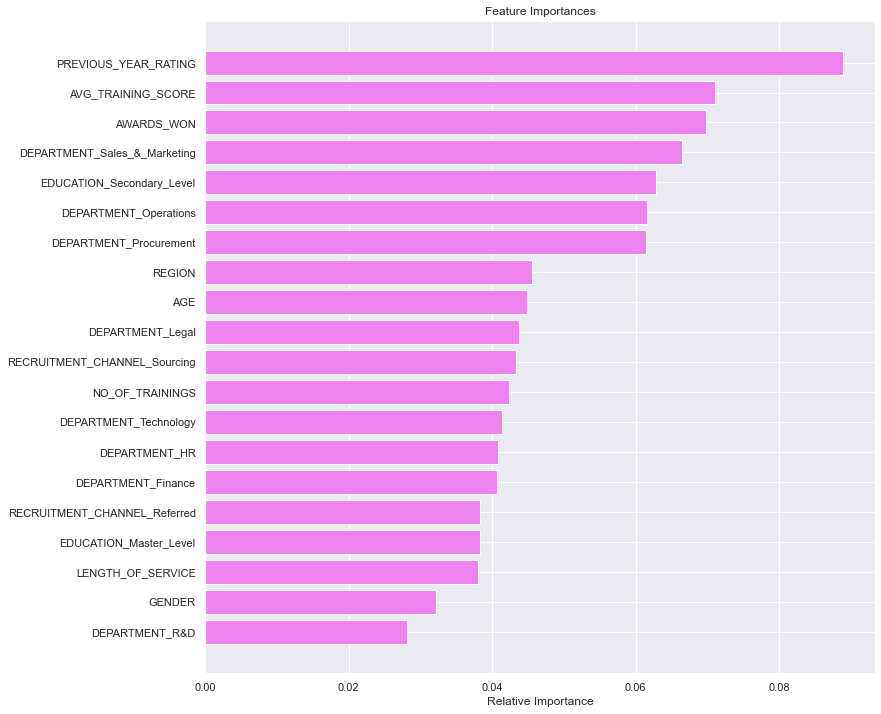

In [174]:
feature_names = X_train.columns
importances = tuned_xgb3.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* PREVIOUS_YEAR_RATINNG, AVG_TRAINING_SCORE, AWARDS_WON, EDUCATION, and DEPARTMENT all rank highly in this feature selection model.

In [175]:
feature_name = list(X_train.columns)
# no of maximum features we need to select
num_feats=10

Using RandomForest to select features based on feature importance. We calculate feature importance using node impurities in each decision tree. In Random forest, the final feature importance is the average of all decision tree feature importance.

In [176]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

embeded_rf_selector = SelectFromModel(RandomForestClassifier(n_estimators=100), max_features=num_feats)
embeded_rf_selector.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestClassifier(), max_features=10)

In [177]:
embeded_rf_support = embeded_rf_selector.get_support()
embeded_rf_feature = X_train.loc[:,embeded_rf_support].columns.tolist()
print(str(len(embeded_rf_feature)), 'selected features')

5 selected features


In [178]:
embeded_rf_feature

['REGION',
 'AGE',
 'PREVIOUS_YEAR_RATING',
 'LENGTH_OF_SERVICE',
 'AVG_TRAINING_SCORE']

* Random Forest has given feature importance to REGION, AGE, PREVIOUS_YEAR_RATING, LENGTH_OF_SERVICE, and AVG_TRAINING_SCORE.

I will also use LightGBM. 

In [179]:
# Install the libraries to enable lightgbm to run.
# conda install -c conda-forge lightgbm 

In [180]:
from sklearn.feature_selection import SelectFromModel
from lightgbm import LGBMClassifier

lgbc=LGBMClassifier(n_estimators=500, learning_rate=0.05, num_leaves=32, colsample_bytree=0.2,
            reg_alpha=3, reg_lambda=1, min_split_gain=0.01, min_child_weight=40)

embeded_lgb_selector = SelectFromModel(lgbc, max_features=num_feats)
embeded_lgb_selector.fit(X_train, y_train)


SelectFromModel(estimator=LGBMClassifier(colsample_bytree=0.2,
                                         learning_rate=0.05,
                                         min_child_weight=40,
                                         min_split_gain=0.01, n_estimators=500,
                                         num_leaves=32, reg_alpha=3,
                                         reg_lambda=1),
                max_features=10)

In [181]:
embeded_lgb_support = embeded_lgb_selector.get_support()
embeded_lgb_feature = X_train.loc[:,embeded_lgb_support].columns.tolist()
print(str(len(embeded_lgb_feature)), 'selected features')

4 selected features


In [182]:
embeded_lgb_feature

['REGION', 'AGE', 'LENGTH_OF_SERVICE', 'AVG_TRAINING_SCORE']

* LightGBM has given feature importance to REGION, AGE, LENGTH_OF_SERVICE, AND AVG_TRAINING_SCORE.

In [183]:
pd.set_option('display.max_rows', None)
# put all selection together
feature_selection_df = pd.DataFrame({'Feature':feature_name, 'Random Forest':embeded_rf_support, 'LightGBM':embeded_lgb_support})
# count the selected times for each feature
feature_selection_df['Total'] = np.sum(feature_selection_df, axis=1)
# display the top 100
feature_selection_df = feature_selection_df.sort_values(['Total','Feature'] , ascending=False)
feature_selection_df.index = range(1, len(feature_selection_df)+1)
feature_selection_df.head(num_feats)

,Feature,Random Forest,LightGBM,Total
1,REGION,True,True,2
2,LENGTH_OF_SERVICE,True,True,2
3,AVG_TRAINING_SCORE,True,True,2
4,AGE,True,True,2
5,PREVIOUS_YEAR_RATING,True,False,1
6,RECRUITMENT_CHANNEL_Sourcing,False,False,0
7,RECRUITMENT_CHANNEL_Referred,False,False,0
8,NO_OF_TRAININGS,False,False,0
9,GENDER,False,False,0
10,EDUCATION_Secondary_Level,False,False,0


* Random Forest and LightGBM give prominence to 4 out of the same 5 variables.

## Building the final model with Column Transformer

* I will create to 2 pipelines, one for numerical columns and one for the categorical columns
* Numerical columns will have missing value pre-processing
* Categorical columns will have one hot encoding and missing value imputation as pre-processing.
* Missing value imputation is done for the entire dataset; if there is any missing value in the data in future it can be handled by the model.
* GENDER will be dropped as a variable as none of the feature selection methods rated it as an important one for this dataset and subsequent model.
* NO_OF_TRAININGS will also be dropped as that variable was not deemed as ranking high up in feature selection importance. The bivariate analysis also showed that it was not a relevant variable for this model.
* AGE and LENGTH_OF_SERVICE are correlated but 2 out of the 3 different feature selection methods rank them as important; therefore, they will remain as part of the model.
* The rest of the variables will be left in the model as there are not so many of them and they all appear to add illuminating flavor to the analysis.

In [184]:
# creating a list of numerical variables
numerical_features = ['PREVIOUS_YEAR_RATING', 'AGE', 'LENGTH_OF_SERVICE', 'AVG_TRAINING_SCORE']

# creating a transformer for numerical variables, which will apply simple imputer on the numerical variables
numeric_transformer = Pipeline(steps=[("imputer", SimpleImputer(strategy="median")), ("scaler", StandardScaler()),])


# creating a list of categorical variables
categorical_features = ['DEPARTMENT', 'REGION', 'EDUCATION', 'RECRUITMENT_CHANNEL', 'AWARDS_WON']

# creating a transformer for categorical variables, which will first apply simple imputer and 
#then do one hot encoding for categorical variables
categorical_transformer = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("onehot", OneHotEncoder(handle_unknown="ignore")),
    ]
)
# handle_unknown = "ignore", allows model to handle any unknown category in the test data

# combining categorical transformer and numerical transformer using a column transformer

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numerical_features),
        ("cat", categorical_transformer, categorical_features),
    ],
    remainder="drop",
)
# remainder = "drop" has been used, it will drop the variables that are not present in "numerical_features" 
# and "categorical_features" 



In [185]:
# make a copy of the original dataset
EmpPromotionDataPipeline=EmpPromotionData_Orig.copy()

In [186]:
# Change the column names to uppercase so that they are easier to read.
EmpPromotionDataPipeline['EMPLOYEE_ID'] = EmpPromotionDataPipeline['employee_id']
EmpPromotionDataPipeline['DEPARTMENT'] = EmpPromotionDataPipeline['department']
EmpPromotionDataPipeline['REGION'] = EmpPromotionDataPipeline['region']
EmpPromotionDataPipeline['EDUCATION'] = EmpPromotionDataPipeline['education']
EmpPromotionDataPipeline['GENDER'] = EmpPromotionDataPipeline['gender']
EmpPromotionDataPipeline['RECRUITMENT_CHANNEL'] = EmpPromotionDataPipeline['recruitment_channel']
EmpPromotionDataPipeline['NO_OF_TRAININGS'] = EmpPromotionDataPipeline['no_of_trainings']
EmpPromotionDataPipeline['AGE'] = EmpPromotionDataPipeline['age']
EmpPromotionDataPipeline['PREVIOUS_YEAR_RATING'] = EmpPromotionDataPipeline['previous_year_rating']
EmpPromotionDataPipeline['LENGTH_OF_SERVICE'] = EmpPromotionDataPipeline['length_of_service']
EmpPromotionDataPipeline['AWARDS_WON'] = EmpPromotionDataPipeline['awards_won']
EmpPromotionDataPipeline['AVG_TRAINING_SCORE'] = EmpPromotionDataPipeline['avg_training_score']
EmpPromotionDataPipeline['IS_PROMOTED'] = EmpPromotionDataPipeline['is_promoted']

In [187]:
# Delete the original column names
EmpPromotionDataPipeline= EmpPromotionDataPipeline.drop(columns = ['employee_id', 'department', 'region', 'education', 'gender', 'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating', 'length_of_service', 'awards_won', 'avg_training_score', 'is_promoted'])

In [188]:
# Separating target variable and other variables
X = EmpPromotionDataPipeline.drop(columns="IS_PROMOTED")
Y = EmpPromotionDataPipeline["IS_PROMOTED"]

First let us do some basic pre-processing.

In [189]:
# EMPLOYEE_ID consists of unique IDs for the employees and hence does not add any value to the modeling
EmpPromotionDataPipeline.drop(columns="EMPLOYEE_ID", axis=1, inplace=True)

In [190]:
# converting the data type of categorical features to 'category'
cat_cols = ['IS_PROMOTED','DEPARTMENT', 'REGION', 'EDUCATION', 'GENDER', 'RECRUITMENT_CHANNEL', 'NO_OF_TRAININGS',  'AWARDS_WON']
EmpPromotionDataPipeline[cat_cols] = EmpPromotionDataPipeline[cat_cols].astype('category')

In [191]:
# Replace the string region names with numeric values for easier computation.
EmpPromotionDataPipeline.REGION=EmpPromotionDataPipeline.REGION.replace('region_1', 1)
EmpPromotionDataPipeline.REGION=EmpPromotionDataPipeline.REGION.replace('region_2', 2)
EmpPromotionDataPipeline.REGION=EmpPromotionDataPipeline.REGION.replace('region_3', 3)
EmpPromotionDataPipeline.REGION=EmpPromotionDataPipeline.REGION.replace('region_4', 4)
EmpPromotionDataPipeline.REGION=EmpPromotionDataPipeline.REGION.replace('region_5', 5)
EmpPromotionDataPipeline.REGION=EmpPromotionDataPipeline.REGION.replace('region_6', 6)
EmpPromotionDataPipeline.REGION=EmpPromotionDataPipeline.REGION.replace('region_7', 7)
EmpPromotionDataPipeline.REGION=EmpPromotionDataPipeline.REGION.replace('region_8', 8)
EmpPromotionDataPipeline.REGION=EmpPromotionDataPipeline.REGION.replace('region_9', 9)
EmpPromotionDataPipeline.REGION=EmpPromotionDataPipeline.REGION.replace('region_10', 10)
EmpPromotionDataPipeline.REGION=EmpPromotionDataPipeline.REGION.replace('region_11', 11)
EmpPromotionDataPipeline.REGION=EmpPromotionDataPipeline.REGION.replace('region_12', 12)
EmpPromotionDataPipeline.REGION=EmpPromotionDataPipeline.REGION.replace('region_13', 13)
EmpPromotionDataPipeline.REGION=EmpPromotionDataPipeline.REGION.replace('region_14', 14)
EmpPromotionDataPipeline.REGION=EmpPromotionDataPipeline.REGION.replace('region_15', 15)
EmpPromotionDataPipeline.REGION=EmpPromotionDataPipeline.REGION.replace('region_16', 16)
EmpPromotionDataPipeline.REGION=EmpPromotionDataPipeline.REGION.replace('region_17', 17)
EmpPromotionDataPipeline.REGION=EmpPromotionDataPipeline.REGION.replace('region_18', 18)
EmpPromotionDataPipeline.REGION=EmpPromotionDataPipeline.REGION.replace('region_19', 19)
EmpPromotionDataPipeline.REGION=EmpPromotionDataPipeline.REGION.replace('region_20', 20)
EmpPromotionDataPipeline.REGION=EmpPromotionDataPipeline.REGION.replace('region_21', 21)
EmpPromotionDataPipeline.REGION=EmpPromotionDataPipeline.REGION.replace('region_22', 22)
EmpPromotionDataPipeline.REGION=EmpPromotionDataPipeline.REGION.replace('region_23', 23)
EmpPromotionDataPipeline.REGION=EmpPromotionDataPipeline.REGION.replace('region_24', 24)
EmpPromotionDataPipeline.REGION=EmpPromotionDataPipeline.REGION.replace('region_25', 25)
EmpPromotionDataPipeline.REGION=EmpPromotionDataPipeline.REGION.replace('region_26', 26)
EmpPromotionDataPipeline.REGION=EmpPromotionDataPipeline.REGION.replace('region_27', 27)
EmpPromotionDataPipeline.REGION=EmpPromotionDataPipeline.REGION.replace('region_28', 28)
EmpPromotionDataPipeline.REGION=EmpPromotionDataPipeline.REGION.replace('region_29', 29)
EmpPromotionDataPipeline.REGION=EmpPromotionDataPipeline.REGION.replace('region_30', 30)
EmpPromotionDataPipelineREGION=EmpPromotionDataPipeline.REGION.replace('region_31', 31)
EmpPromotionDataPipeline.REGION=EmpPromotionDataPipeline.REGION.replace('region_32', 32)
EmpPromotionDataPipeline.REGION=EmpPromotionDataPipeline.REGION.replace('region_33', 33)
EmpPromotionDataPipeline.REGION=EmpPromotionDataPipeline.REGION.replace('region_34', 34)

In [192]:
# Convert the REGION variable to a category data type
EmpPromotionDataPipeline.REGION = EmpPromotionDataPipeline.REGION.astype('category')

In [193]:
# Replace the EDUCATION text values with values without spaces and apostrophes for easier computation.
EmpPromotionDataPipeline.EDUCATION=EmpPromotionDataPipeline.EDUCATION.replace("Below Secondary", "Secondary_Level")
EmpPromotionDataPipeline.EDUCATION=EmpPromotionDataPipeline.EDUCATION.replace("Bachelor's", "Bachelor_Level")
EmpPromotionDataPipeline.EDUCATION=EmpPromotionDataPipeline.EDUCATION.replace("Master's & above", "Master_Level")

# Replace the DEPARTMENT value of 'Sales & Marketing' with 'Sales_&_Marketing' to eliminate the spaces
EmpPromotionDataPipeline.DEPARTMENT=EmpPromotionDataPipeline.DEPARTMENT.replace("Sales & Marketing", "Sales_&_Marketing")

# Replace the lowercase GENDER values'm' and 'f' with uppercase 'M' and 'F'.
EmpPromotionDataPipeline.GENDER=EmpPromotionDataPipeline.GENDER.replace("m", "M")
EmpPromotionDataPipeline.GENDER=EmpPromotionDataPipeline.GENDER.replace("f", "F")

# Replace the lowercase RECRUITMENT_CHANNEL values now begin with an uppercase letter.
EmpPromotionDataPipeline.RECRUITMENT_CHANNEL=EmpPromotionDataPipeline.RECRUITMENT_CHANNEL.replace("other", "Other")
EmpPromotionDataPipeline.RECRUITMENT_CHANNEL=EmpPromotionDataPipeline.RECRUITMENT_CHANNEL.replace("referred", "Referred")
EmpPromotionDataPipeline.RECRUITMENT_CHANNEL=EmpPromotionDataPipeline.RECRUITMENT_CHANNEL.replace("sourcing", "Sourcing")

In [194]:
# Replace nulls with zeros in PREVIOUS_YEAR_RATING so that errors are not generated in data type conversions.
EmpPromotionDataPipeline.PREVIOUS_YEAR_RATING=EmpPromotionDataPipeline.PREVIOUS_YEAR_RATING.replace(np.NaN, 0)

The best model (in this scenario XGBoost) we need to process with is already known, so 3 parts (training, test, and validation) are no longer required.

In [195]:
# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1, stratify=Y
)
print(X_train.shape, X_test.shape)

(38365, 12) (16443, 12)


In [196]:
# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1, stratify=Y
)
print(X_train.shape, X_test.shape)

(38365, 12) (16443, 12)


In [197]:
# Undersample train set
rus = RandomUnderSampler(random_state=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

In [198]:
# Creating new pipeline with best parameters
model = Pipeline(
    steps=[
        ("pre", preprocessor),    
        ("XGB",
        XGBClassifier(
           random_state=1,
           eval_metric="logloss",
           subsample=0.7,
           scale_pos_weight=10,
           n_estimators=150,
           learning_rate=0.05,
           gamma=3,
          ),
        ),
    ]
)
# Fit the model on training data
model.fit(X_train_un, y_train_un)

Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['PREVIOUS_YEAR_RATING',
                                                   'AGE', 'LENGTH_OF_SERVICE',
                                                   'AVG_TRAINING_SCORE']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                        

## Business Recommendations

* We have been able to build a predictive model:

  a) Likoma company can deploy this model in order to predictably identify employees that will most likely be          recommended for promotion.
  
  b) the company can use to find the key indicators and characteristics that drive promotion recommendations. 
  
  c) based on that the company can take steps to retain talented and productive staff that will help grow the        organization and achieve its stated goals.
  

* Factors that drive recommendations for employee promotion are (in various combinations) PREVIOUS_YEAR_RATING,   AVG_TRAINING_SCORE, AWARDS_WON, AGE, LENGTH_OF_SERVICE, and REGION.


* Sales & Marketing and Operations are the top two departments with employees recommended for promotion but       they have the highest number of employees as well. The Technology department has the highest within category   percentage of promotions at 10.8%. The Human Resources department should keep track of the statistics to       ensure that there are equitable progression opportunities across the organization.


* Region 2 has the highest number of employees recommended for promotion. Second and third respectively are       region 22 and region 7 respectively. Those 3 regions also have the 3 highest number of employees overall.       Region 4 has the highest within category percentage of promotions at 14.4%. Likoma should be aware of why the     employees from these regions tend to be more likely to be promoted. Are they better educated? Do more           managers from those regions work for Likoma hence they are promoting their own? There is no significant           difference in the region distributions of the employees recommended for promotion and those that were not. 


* Employees with Bachelor's level of education form the largest number of those recommended for promotion.       Master's level and above educated employees have the largest within category percentage of promotion           recommendations.


* Employees that have been at the company 3 years had the highest number of employees recommended for             promotion. 4 years and 2 years length of service come next. The period of 2 to 4 years length of service       appears to be a particularly crucial time frame for promotion recommendations. There are also recommendations   for promotion at 13 years length of service and above.


* More males were recommended for promotion and there are overall more male employees at the company in           general. There is no significant difference in the gender distribution between employees that were             recommended for promotion and those that were not. Females have a higher within category rate of promotion     recommendations.


* Recommendations for promotions are most common from the late 20s to the middle to late 30s. There are also     recommendations for promotion in outlier ages rangng from the early 50s to 60. There is no significant         difference in the age distributions of the employees recommended for promotion and those that were not. 


* Employees having an average training score in current evaluations ranging from 58/59 to 83 appears to be a     good indicator towards being recommended for promotion. There is a difference in the average training score     in current evaluations distributions between those employees that were recommended for promotion and those     that were not.


* An employee rating the previous year of 5.0, 3.0, and 4.0 had the highest number of promotion                   recommendations. A rating of 5.0 had the highest within category percentage of employees recommended for       promotion.


* Employees recruited via the "other" recruitment channel category had the highest count of those recommended     for promotion at 2556. Interestingly, the "referred" category had the highest within category rates of         promotion recommendations.


* Likoma company should pay attention to these key variables among their employees in order to effectively           identify those employees that would make great candidates for promotion.